In [2]:
import numpy as np
import pandas as pd

from pydub import AudioSegment
from scipy.io import wavfile
import wave
import re

import statistics

In [1]:
import os
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import numpy as np

In [56]:
audio_directory_ACLS_CEO = "D://forced Alignment/FFT Analysis/Clipping/ACLS_CEO_F_6.wav"
audio_directory_ACLS_EVP = "D://forced Alignment/FFT Analysis/Clipping/ACLS_EVP_M_5.wav"
audio_directory_ADM_CFO = "D://forced Alignment/FFT Analysis/Clipping/ADM_CFO_M_6.wav"
audio_directory_ADM_EVP = "D://forced Alignment/FFT Analysis/Clipping/ADM_EVP_M_6.wav"
audio_directory_ADVS_CEO = "D://forced Alignment/FFT Analysis/Clipping/ADVS_CEO_F_5.wav"
audio_directory_ADVS_CFO = "D://forced Alignment/FFT Analysis/Clipping/ADVS_CFO_M_6.wav"
audio_directory_AMD_CEO = "D://forced Alignment/FFT Analysis/Clipping/AMD_CEO_F_5.wav"
audio_directory_AMD_CFO = "D://forced Alignment/FFT Analysis/Clipping/AMD_CFO_M_6.wav"
audio_directory_AVP_CFO = "D://forced Alignment/FFT Analysis/Clipping/AVP_CFO_M_6.wav"
audio_directory_BHE_CFO = "D://forced Alignment/FFT Analysis/Clipping/BHE_CFO_F_6.wav"
audio_directory_CLW_CFO = "D://forced Alignment/FFT Analysis/Clipping/CLW_CFO_M_6.wav"


In [57]:
X_ACLS_CEO, sr = librosa.load(audio_directory_ACLS_CEO)
X_ACLS_EVP, sr = librosa.load(audio_directory_ACLS_EVP)
X_ADM_CFO, sr = librosa.load(audio_directory_ADM_CFO)
X_ADM_EVP, sr = librosa.load(audio_directory_ADM_EVP)
X_ADVS_CEO, sr = librosa.load(audio_directory_ADVS_CEO)
X_ADVS_CFO, sr = librosa.load(audio_directory_ADVS_CFO)
X_AMD_CEO, sr = librosa.load(audio_directory_AMD_CEO)
X_AMD_CFO, sr = librosa.load(audio_directory_AMD_CFO)
X_AVP_CFO, sr = librosa.load(audio_directory_AVP_CFO)
X_BHE_CFO, sr = librosa.load(audio_directory_BHE_CFO)
X_CLW_CFO, sr = librosa.load(audio_directory_CLW_CFO)

In [5]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

In [64]:
def plot_6_minutes(X,sr):
    # Complete 6 minutes audio

    plot_magnitude_spectrum(X, sr, "6 Minutes", 0.1)

    # Plots for 2 minutes

    plot_magnitude_spectrum(X[0:(120*sr)], sr, "0:00 - 2:00", 0.1)
    plot_magnitude_spectrum(X[(120*sr):(240*sr)], sr, "2:00 - 4:00", 0.1)
    plot_magnitude_spectrum(X[(240*sr):(360*sr)], sr, "A4:00 - 6:00", 0.1)

    # Plots for 1 minute 

    plot_magnitude_spectrum(X[(0*sr):(60*sr)], sr, "0:00 - 1:00", 0.1)
    plot_magnitude_spectrum(X[(60*sr):(120*sr)], sr, "1:00 - 2:00", 0.1)
    plot_magnitude_spectrum(X[(120*sr):(180*sr)], sr, "2:00 - 3:00", 0.1)
    plot_magnitude_spectrum(X[(180*sr):(240*sr)], sr, "3:00 - 4:00", 0.1)

    # Plot for 30 seconds

    plot_magnitude_spectrum(X[(0*sr):(30*sr)], sr, "0:00 - 0:30", 0.1)
    plot_magnitude_spectrum(X[(120*sr):(150*sr)], sr, "2:00 - 0:30", 0.1)
    plot_magnitude_spectrum(X[(180*sr):(210*sr)], sr, "3:00 - 3:30", 0.1)

    # Plot for 15 seconds

    plot_magnitude_spectrum(X[(240*sr):(270*sr)], sr, "4:00 - 4:15", 0.1)
    plot_magnitude_spectrum(X[(165*sr):(180*sr)], sr, "2:45 - 3:00", 0.1)
    plot_magnitude_spectrum(X[(210*sr):(225*sr)], sr, "3:30 - 3:45", 0.1)


In [65]:
def plot_5_minutes(X,sr):


    # Complete 5 minutes audio

    plot_magnitude_spectrum(X, sr, "0:00 - 5:00 Minutes", 0.1)

    # Plots for 2 minutes

    plot_magnitude_spectrum(X[0*sr:(120*sr)], sr, "0:00 - 2:00", 0.1)
    plot_magnitude_spectrum(X[(120*sr):(240*sr)], sr, "2:00 - 4:00", 0.1)
    plot_magnitude_spectrum(X[(180*sr):(300*sr)], sr, "3:00 - 5:00", 0.1)

    # Plots for 1 minute 

    plot_magnitude_spectrum(X[(0*sr):(60*sr)], sr, "0:00 - 1:00", 0.1)
    plot_magnitude_spectrum(X[(60*sr):(120*sr)], sr, "1:00 - 2:00", 0.1)
    plot_magnitude_spectrum(X[(120*sr):(180*sr)], sr, "2:00 - 3:00", 0.1) 
    plot_magnitude_spectrum(X[(180*sr):(240*sr)], sr, "3:00 - 4:00", 0.1)

    # Plot for 30 seconds

    plot_magnitude_spectrum(X[(0*sr):(30*sr)], sr, "0:00 - 0:30", 0.1)
    plot_magnitude_spectrum(X[(120*sr):(150*sr)], sr, "2:00 - 0:30", 0.1)
    plot_magnitude_spectrum(X[(180*sr):(210*sr)], sr, "3:00 - 3:30", 0.1)

    # Plot for 15 seconds

    plot_magnitude_spectrum(X[(240*sr):(270*sr)], sr, "4:00 - 4:15", 0.1)
    plot_magnitude_spectrum(X[(165*sr):(180*sr)], sr, "2:45 - 3:00", 0.1)
    plot_magnitude_spectrum(X[(210*sr):(225*sr)], sr, "3:30 - 3:45", 0.1)

## Speaker 1-  ACLS : CEO / Female

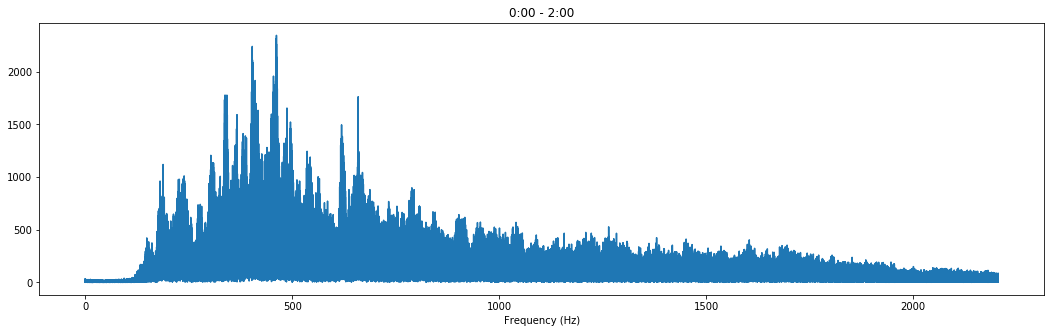

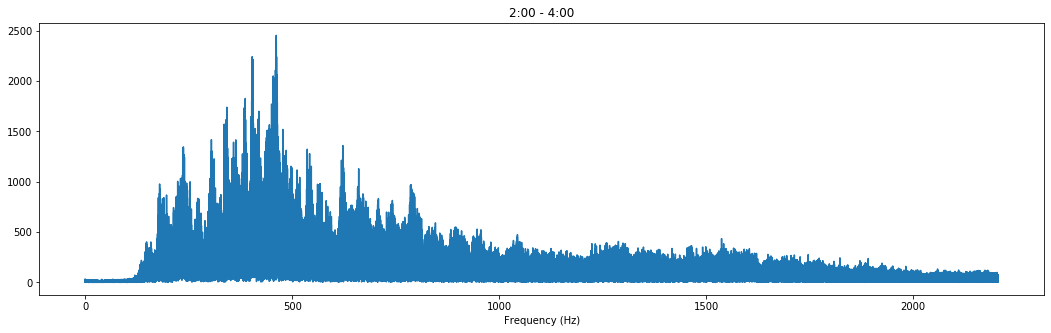

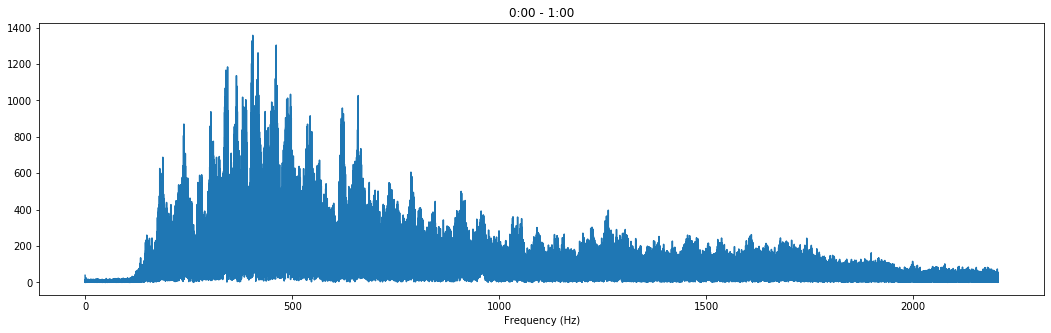

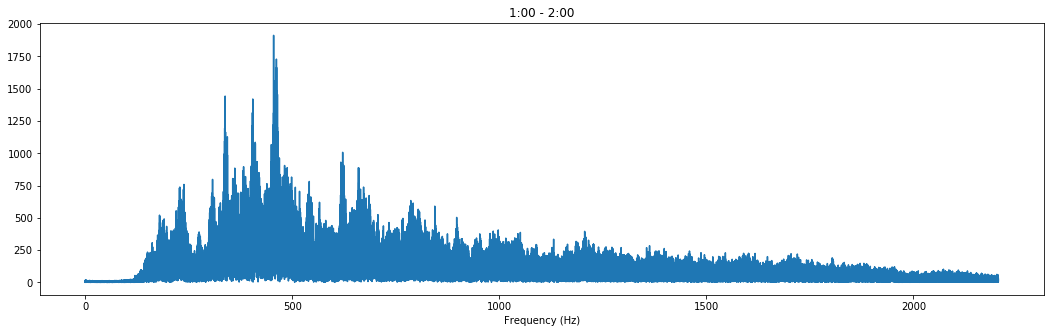

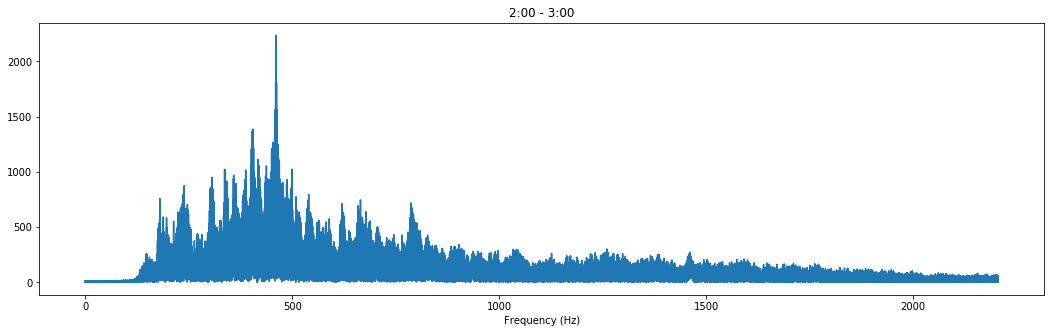

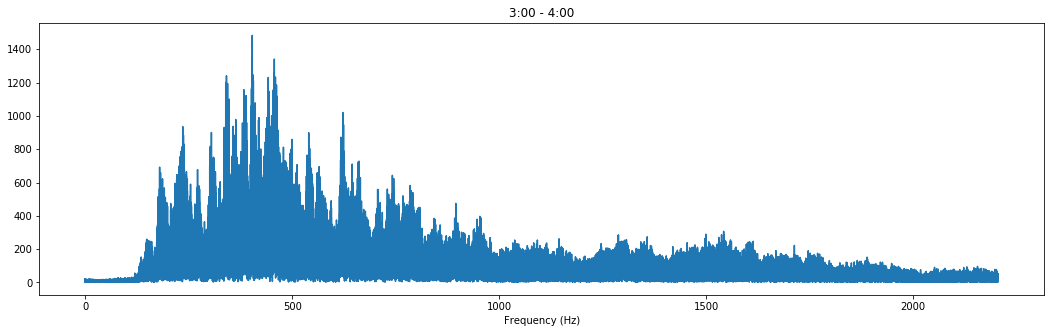

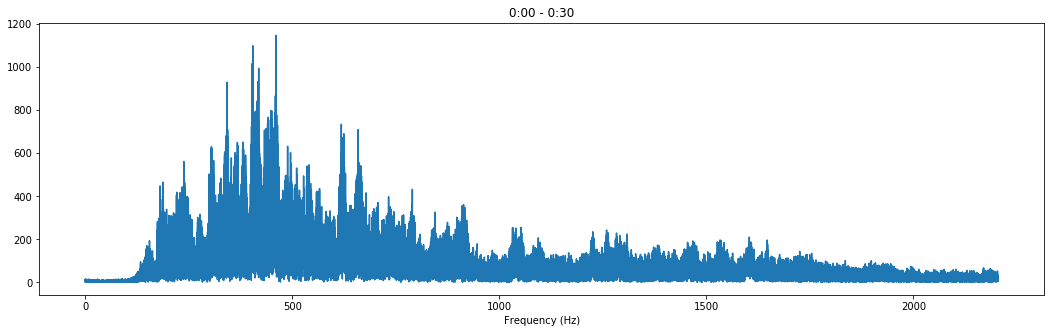

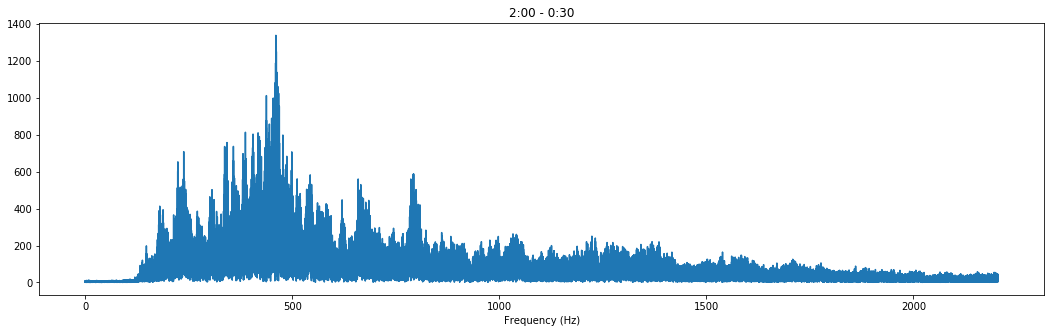

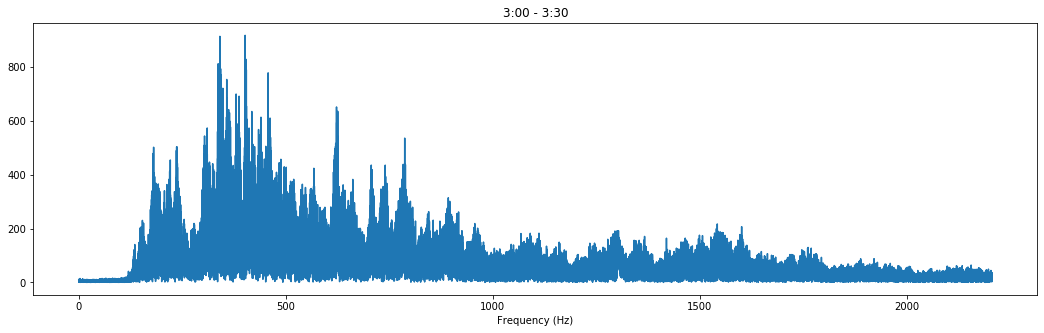

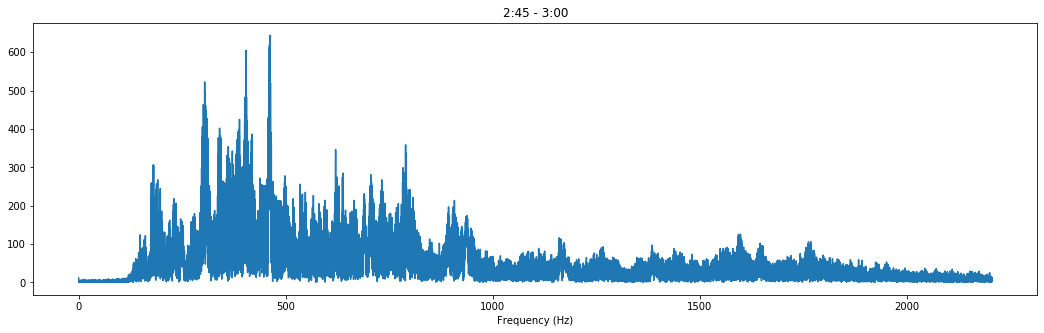

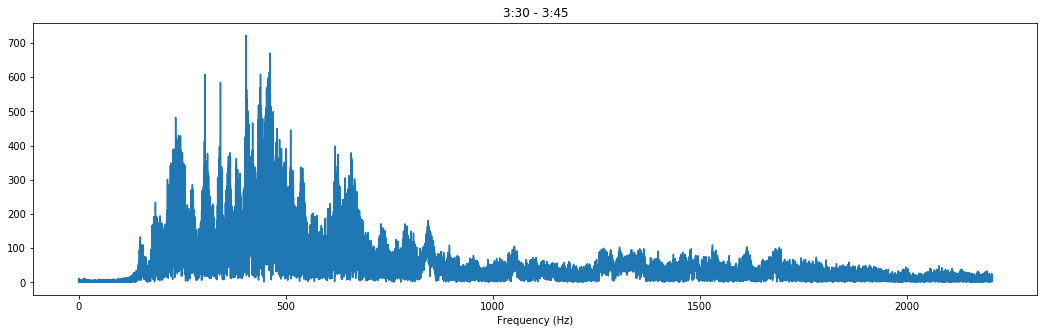

In [63]:
# Complete 6 minutes audio

plot_6_minutes(X_ACLS_CEO, sr)


## Speaker 2: ACLS EVP / Male
### 5 minutes

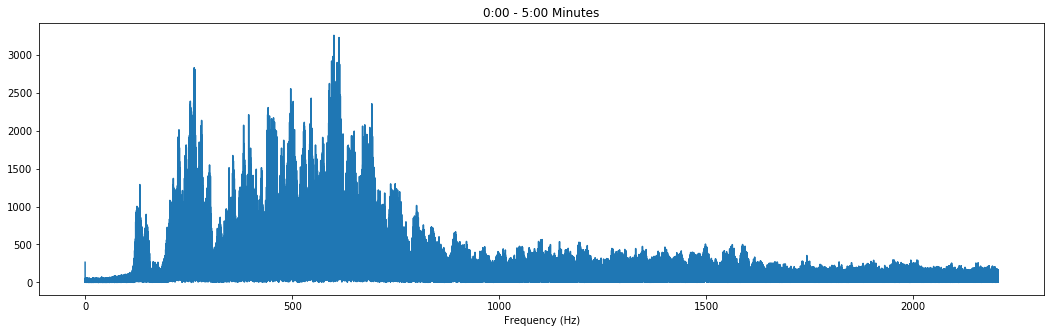

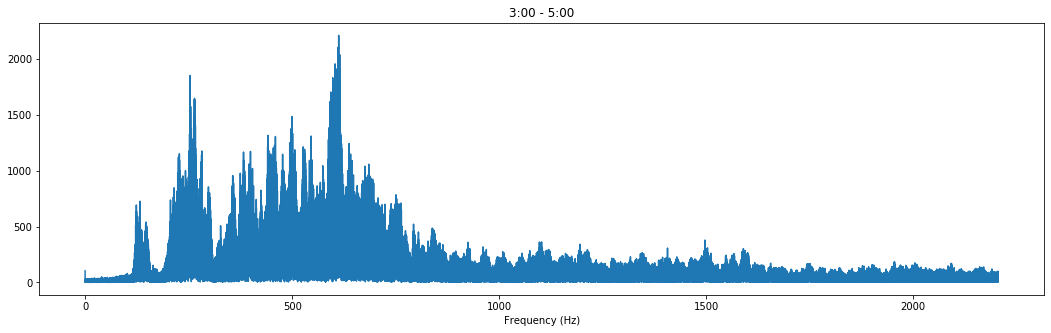

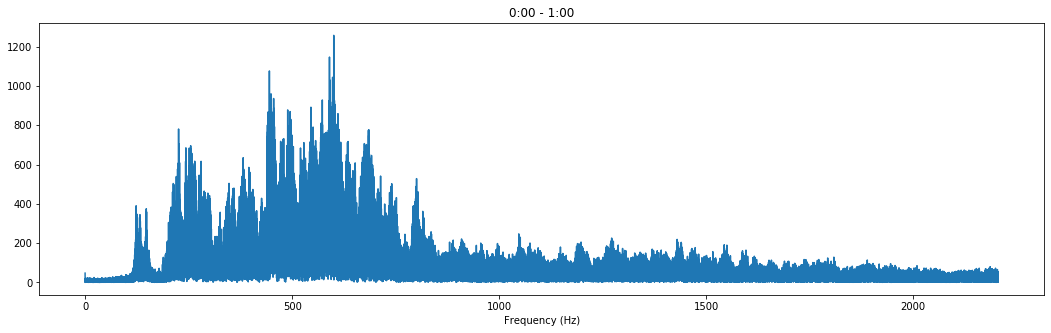

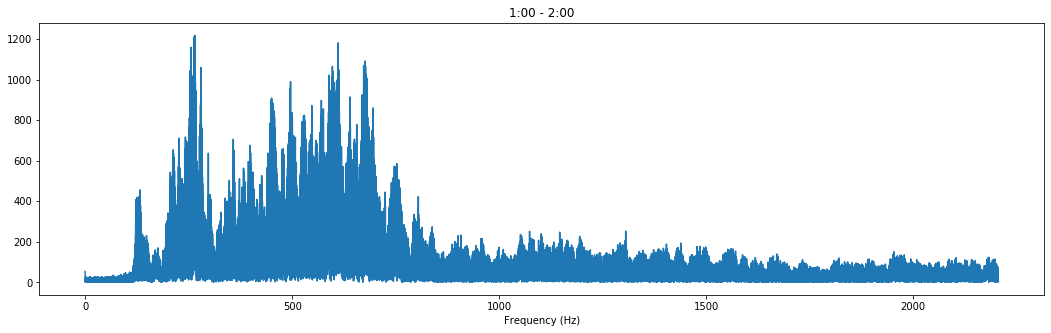

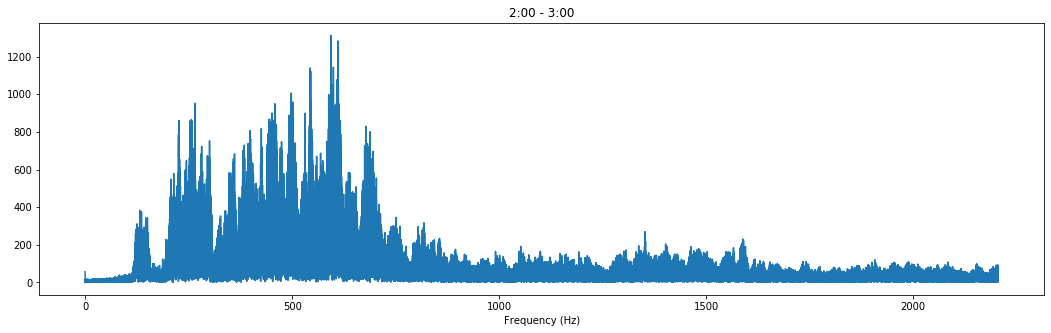

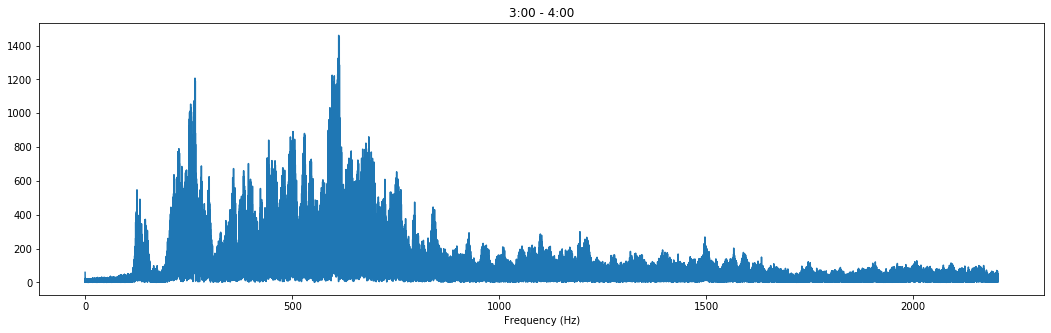

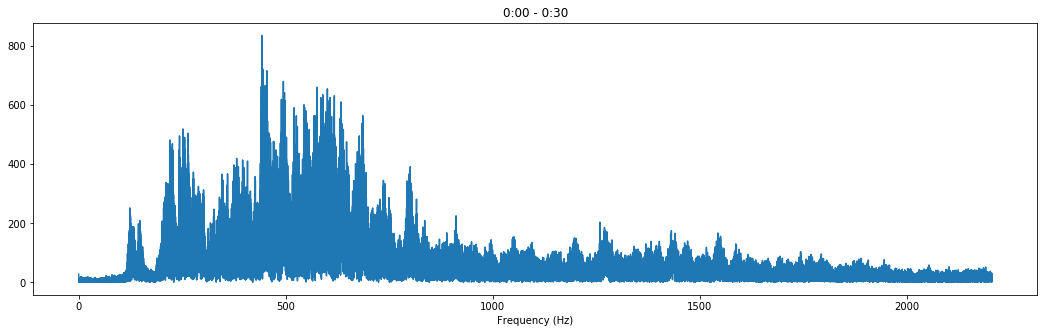

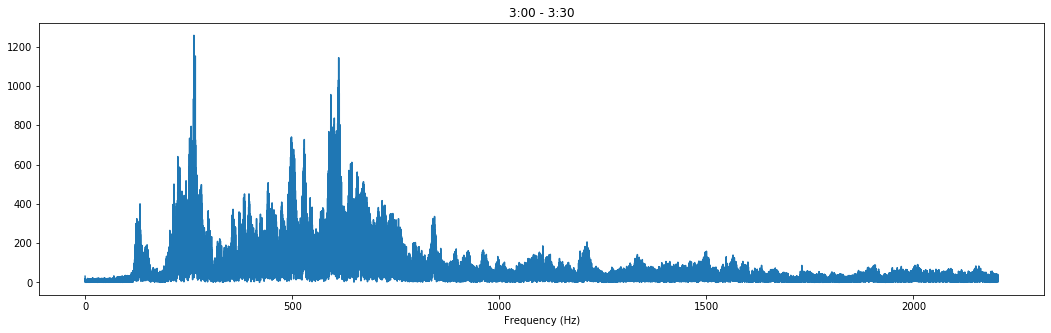

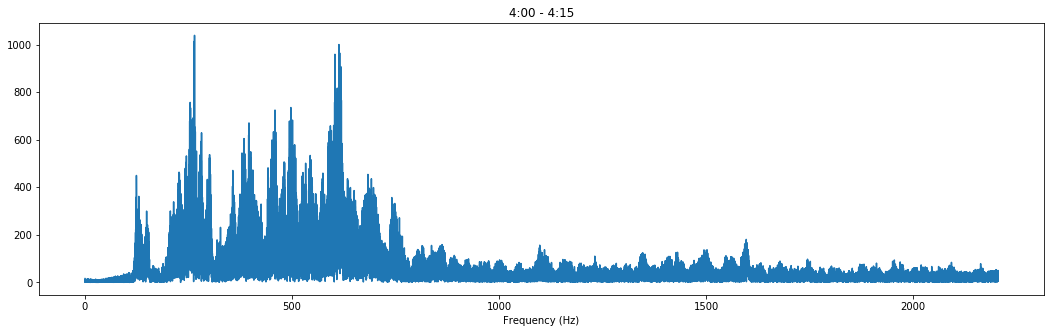

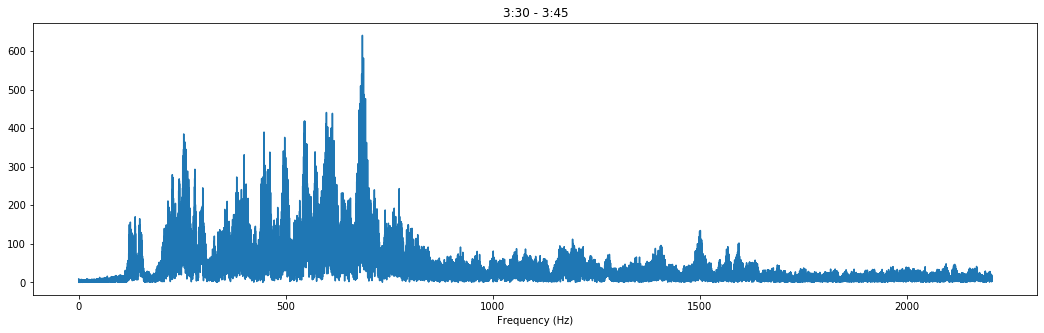

In [67]:
# Complete 5 minutes audio

plot_5_minutes(X_ACLS_EVP, sr)


## Speaker 3: ADM CFO / Male

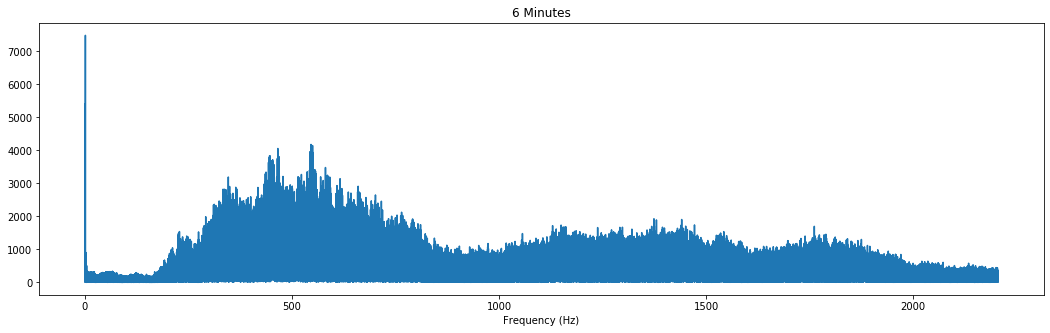

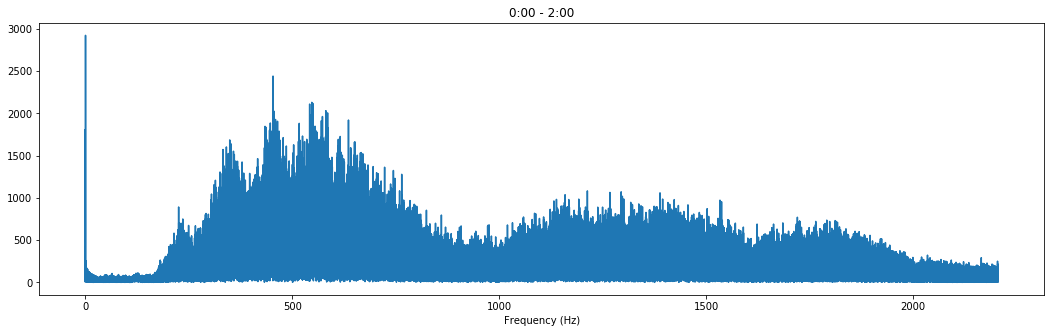

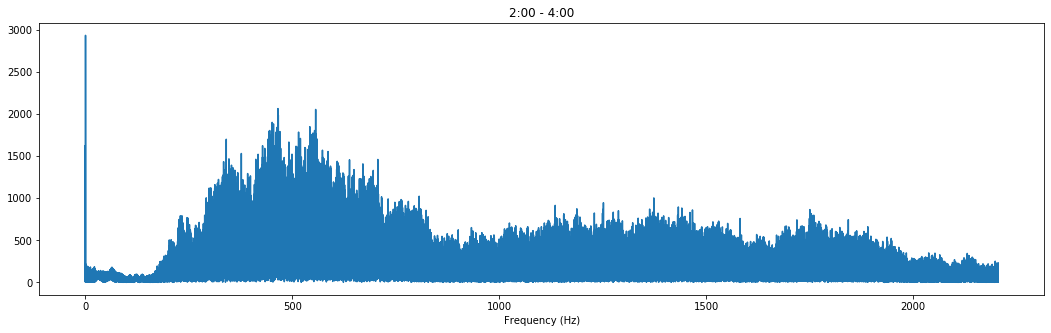

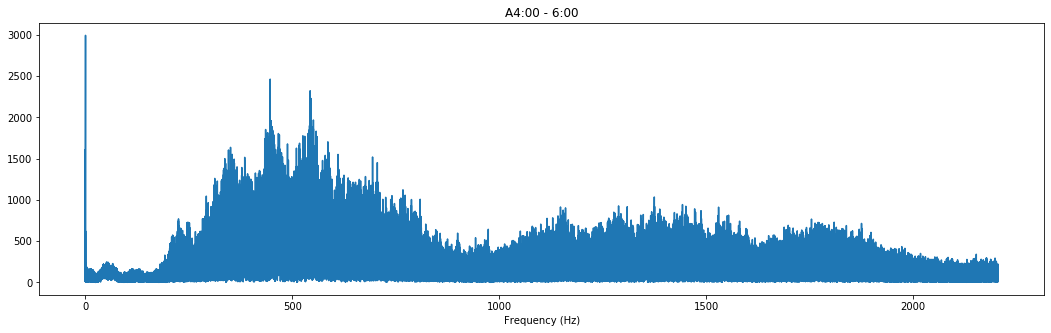

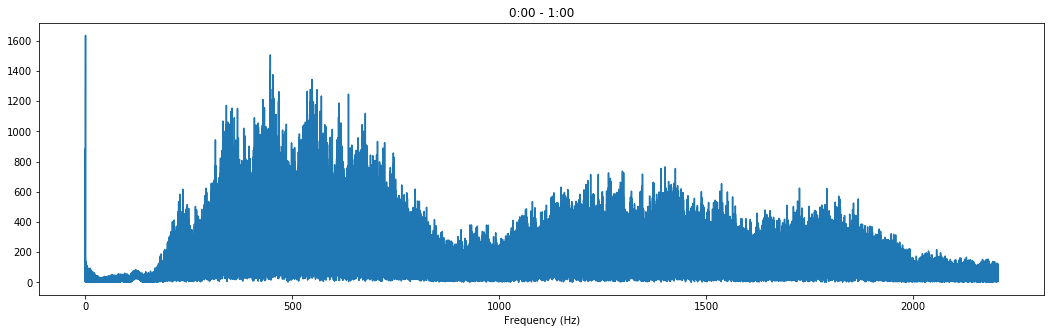

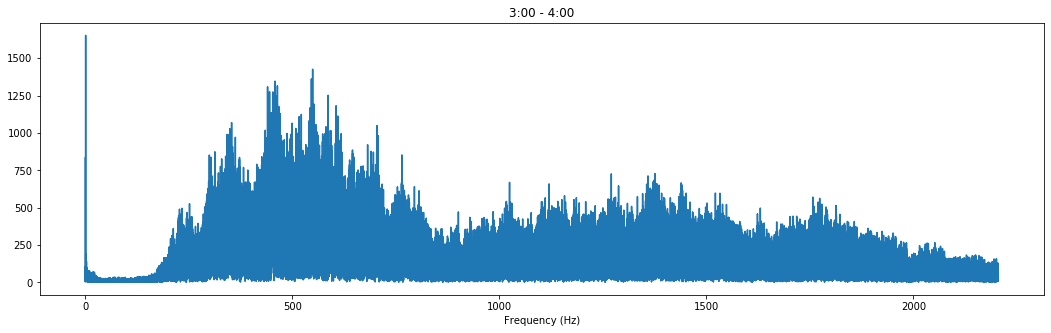

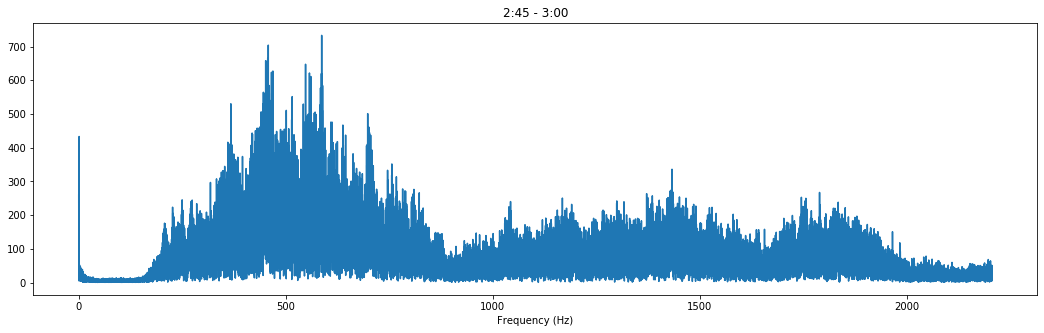

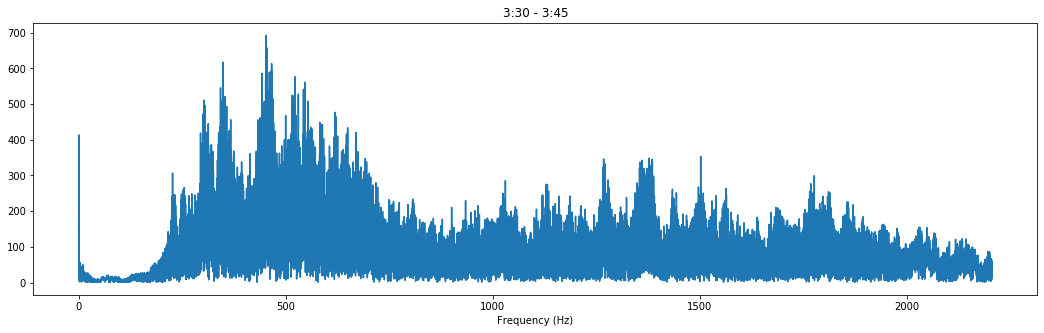

In [68]:
# Complete 6 minutes audio

plot_6_minutes(X_ADM_CFO, sr)

## Speaker 4: ADM EVP / Male

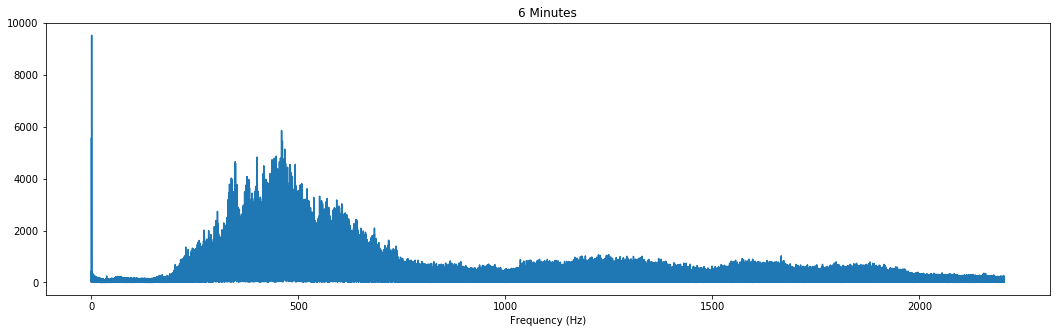

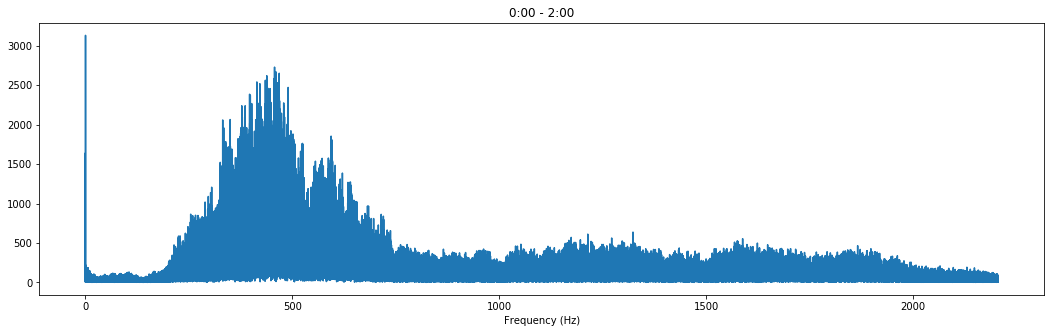

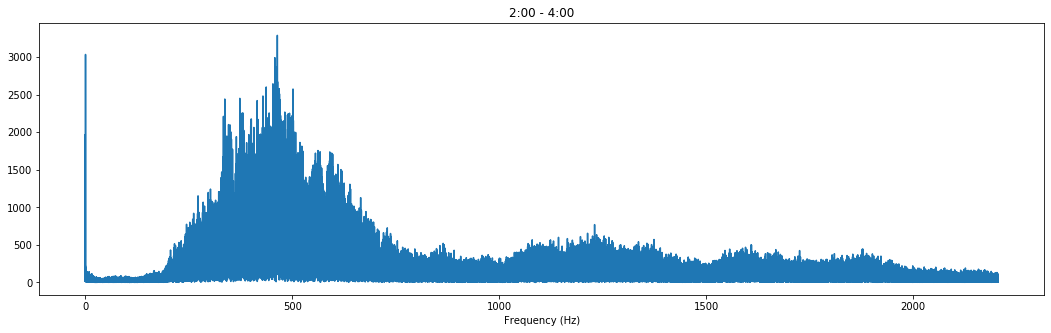

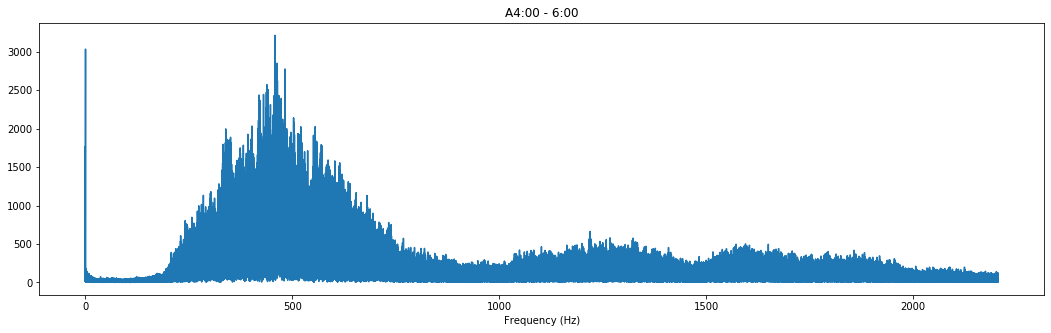

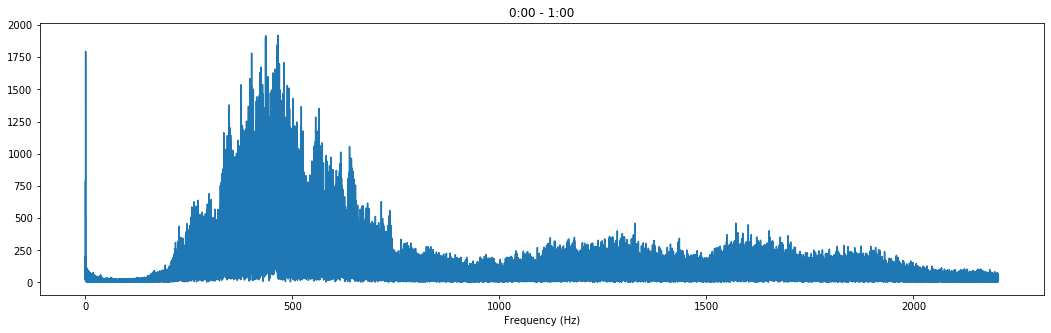

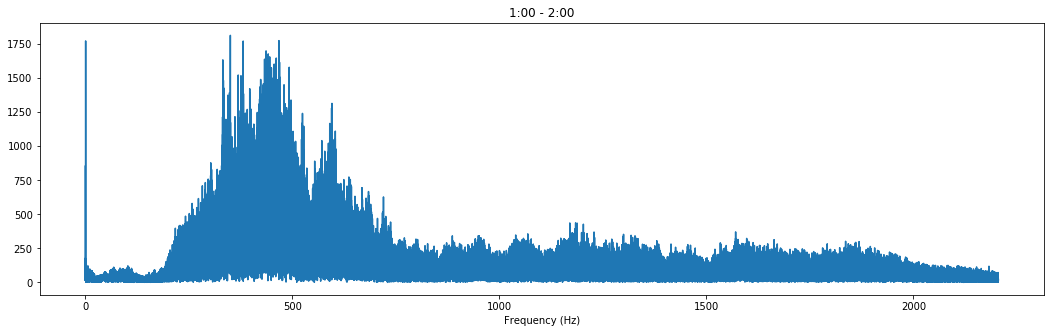

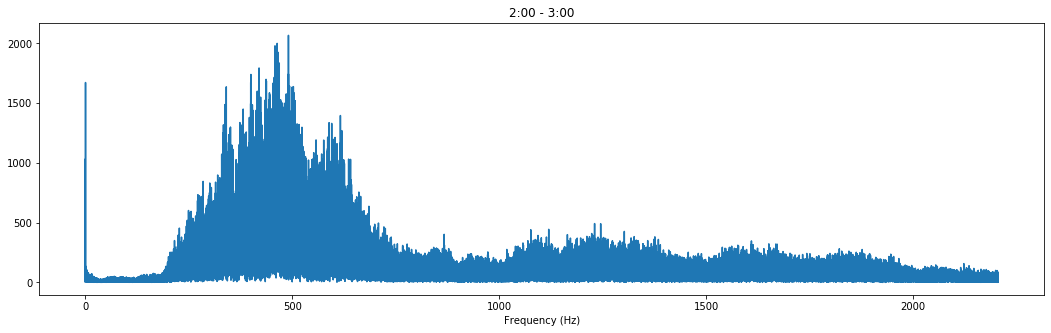

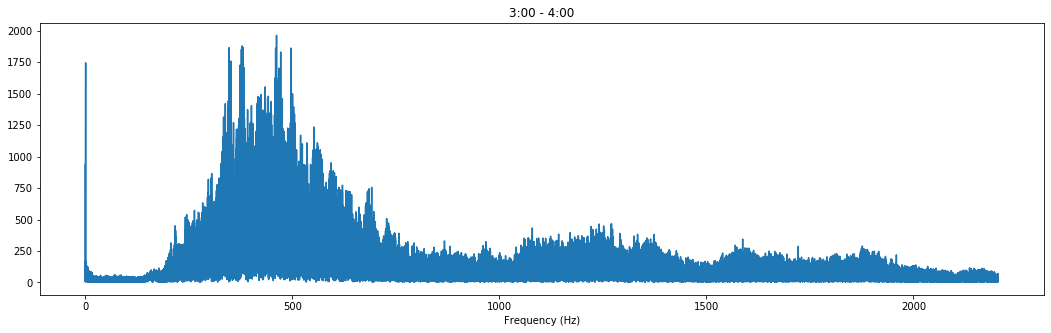

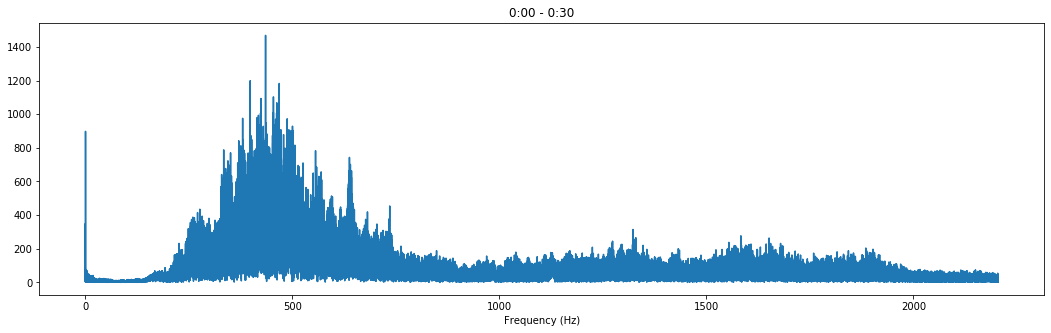

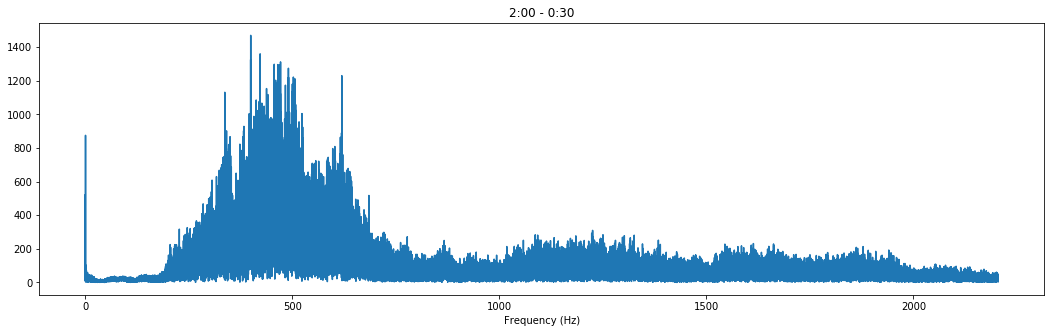

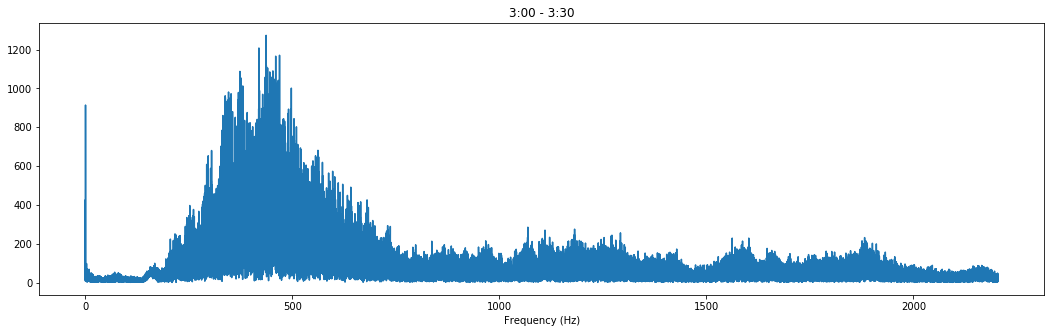

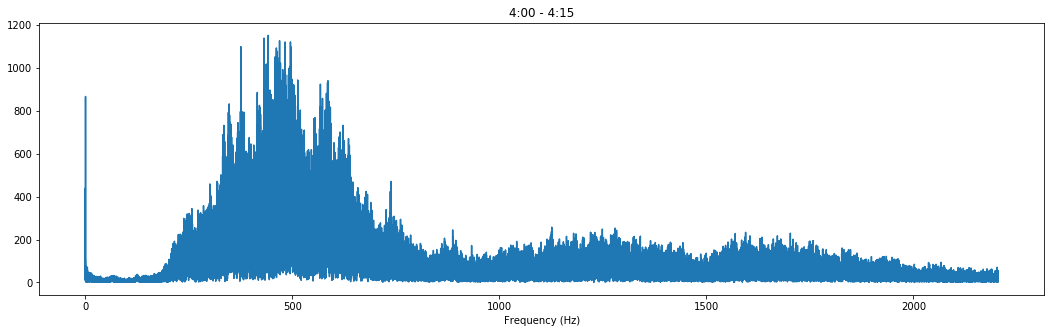

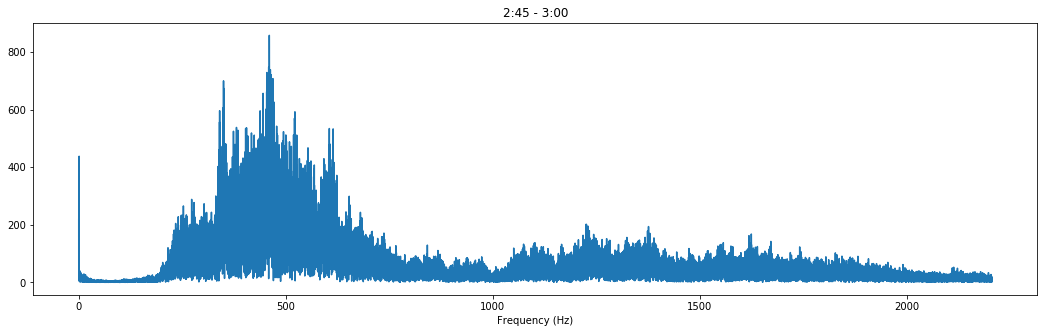

In [69]:
plot_6_minutes(X_ADM_EVP, sr)

## Speaker 5: ADVS CEO / Female
### 5 minutes

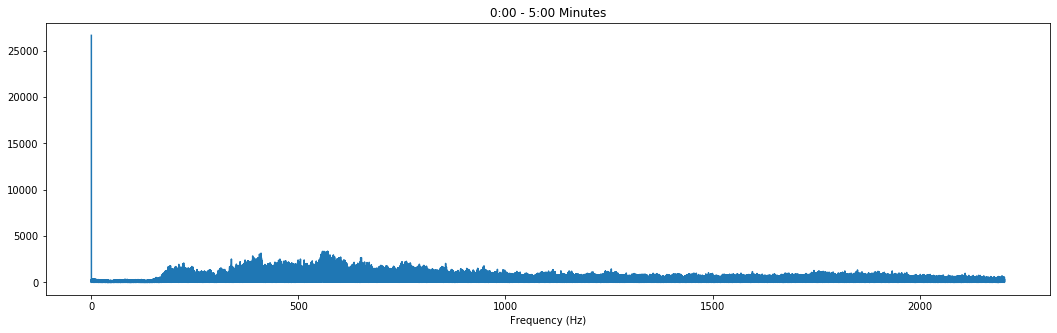

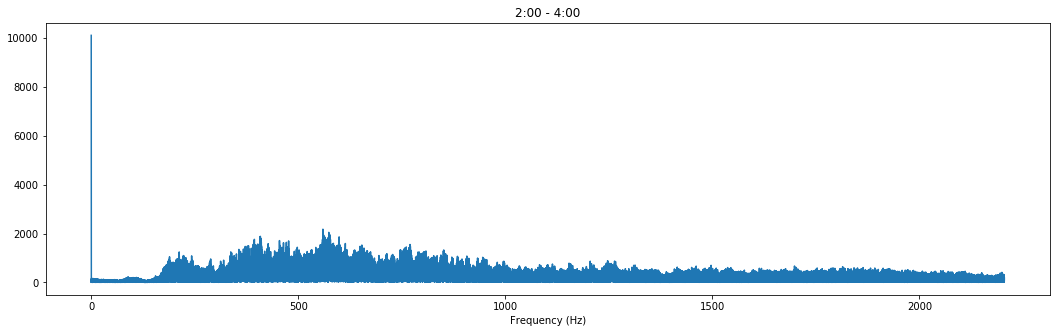

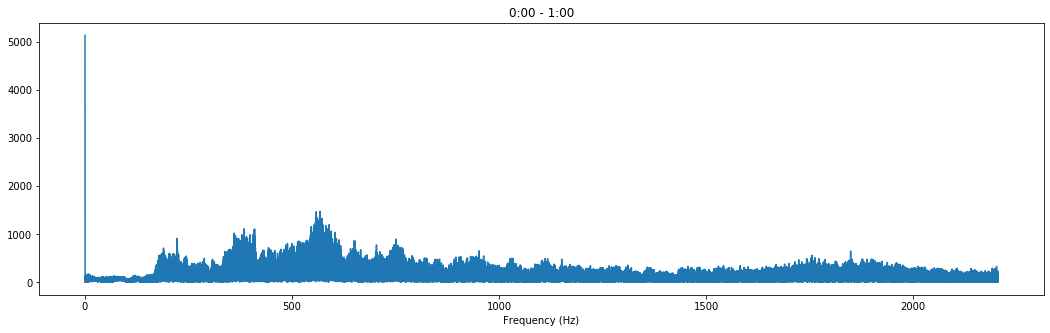

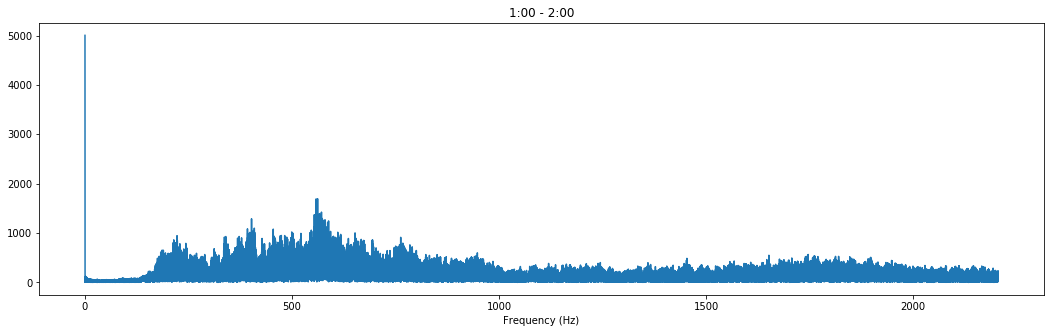

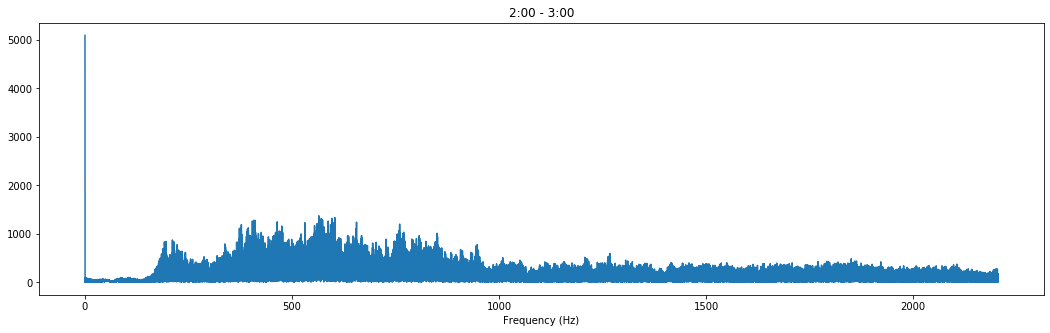

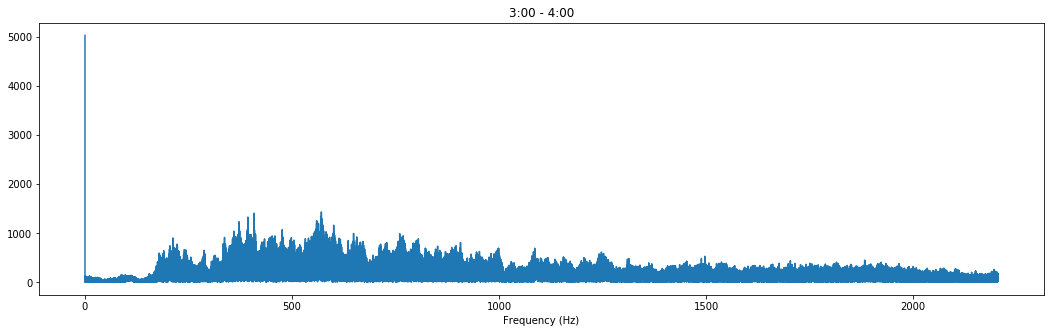

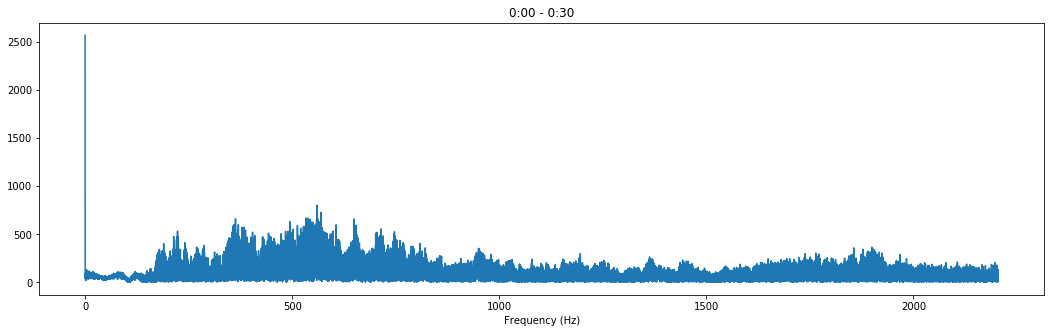

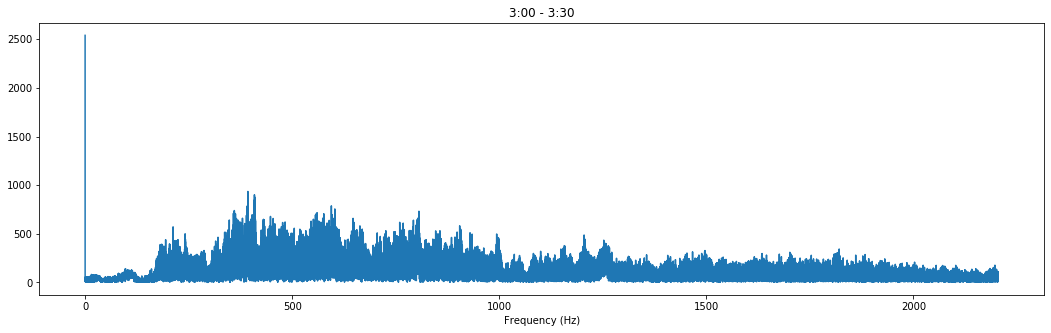

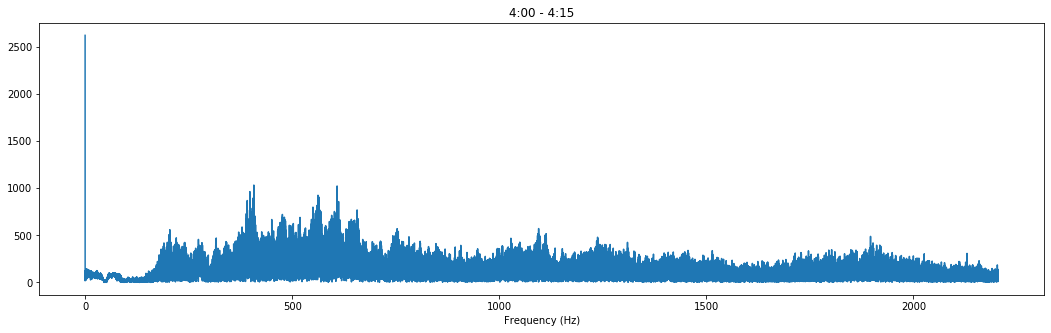

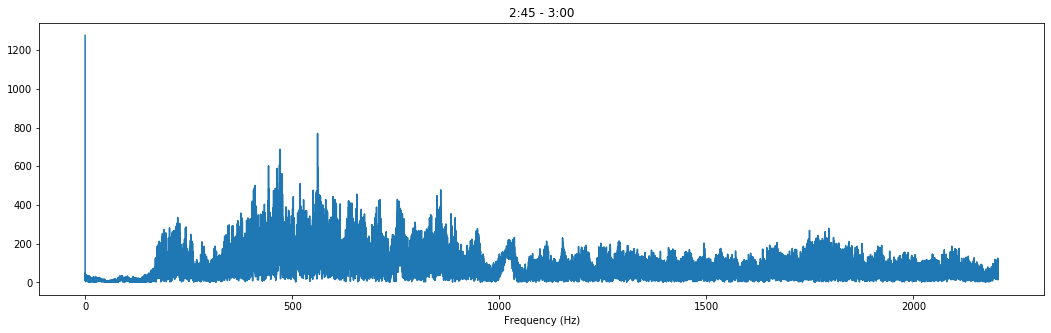

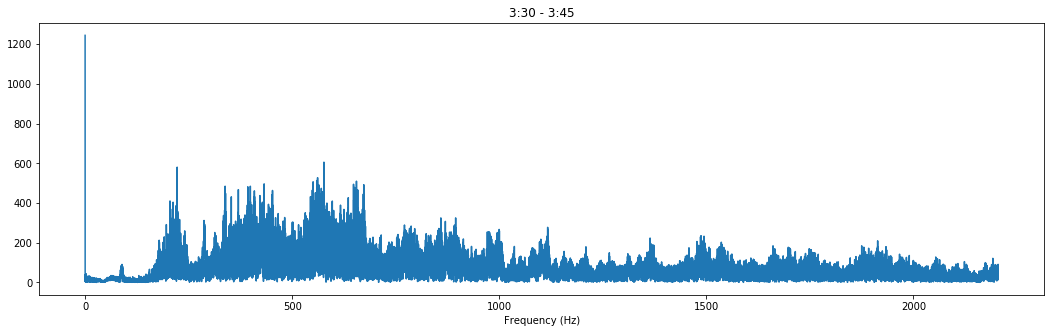

In [70]:
plot_5_minutes(X_ADVS_CEO, sr)

## Speaker 6: ADVS CFO / Male

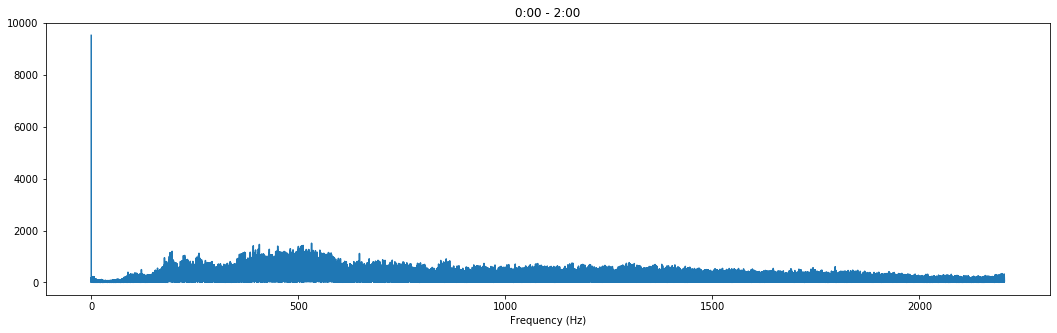

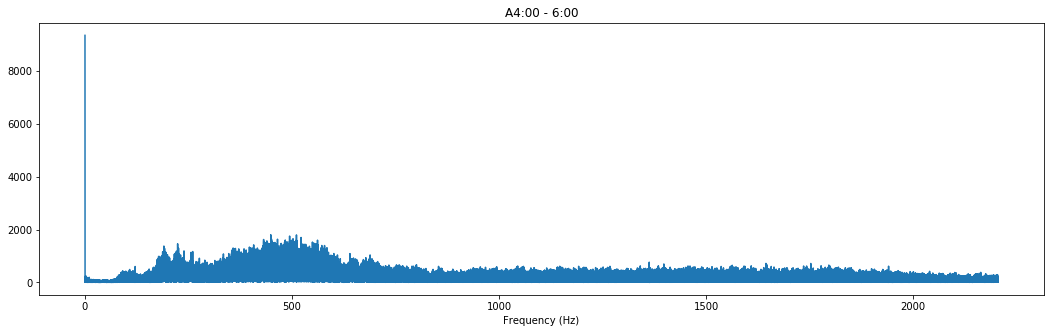

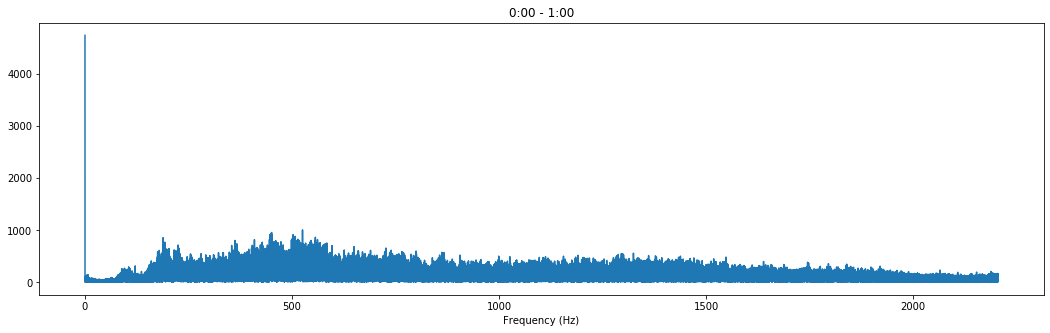

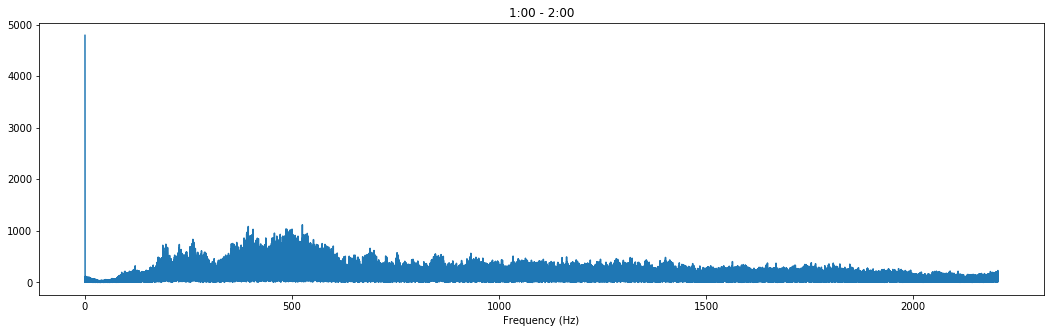

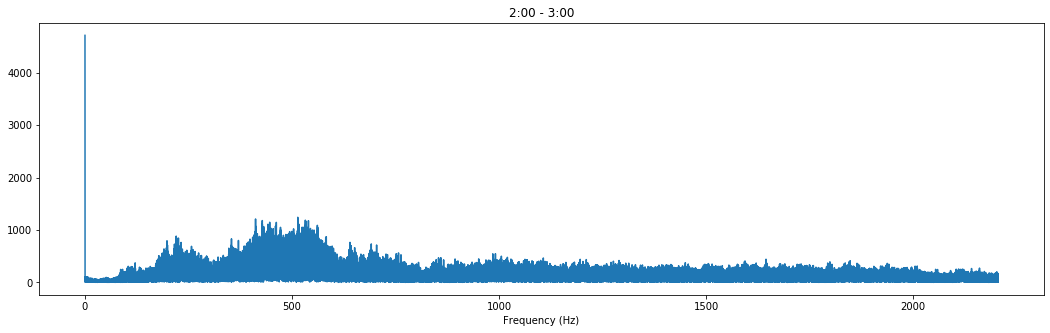

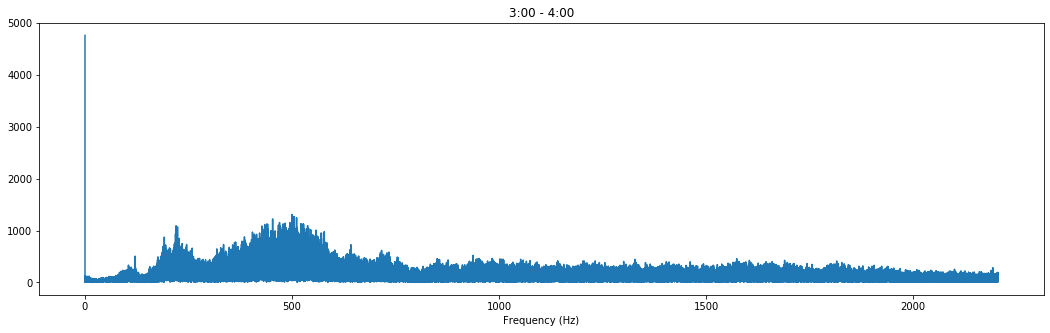

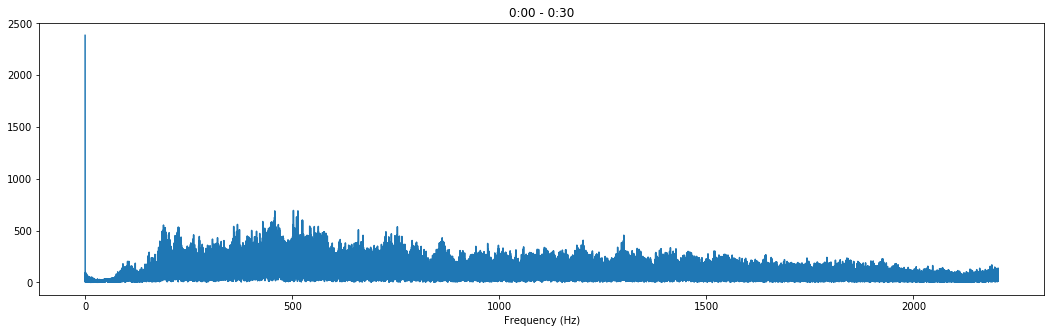

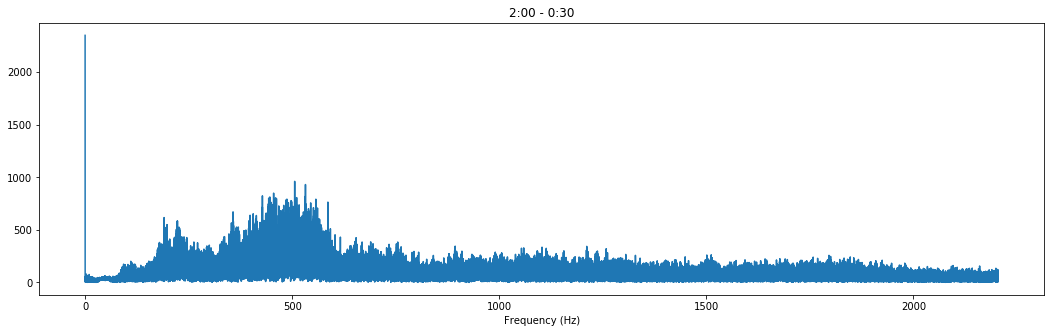

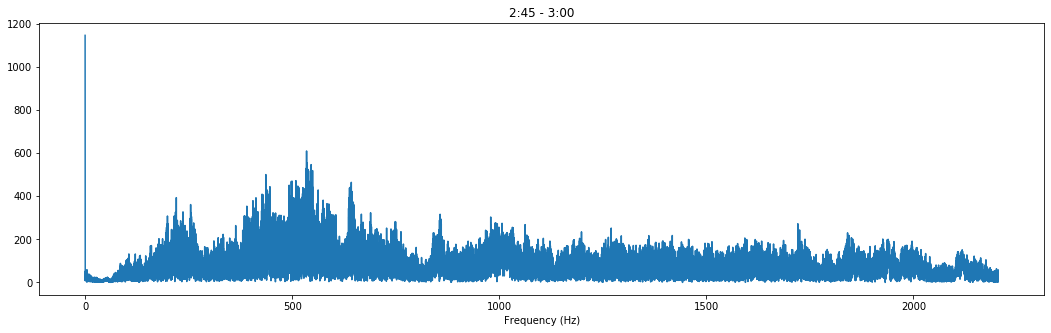

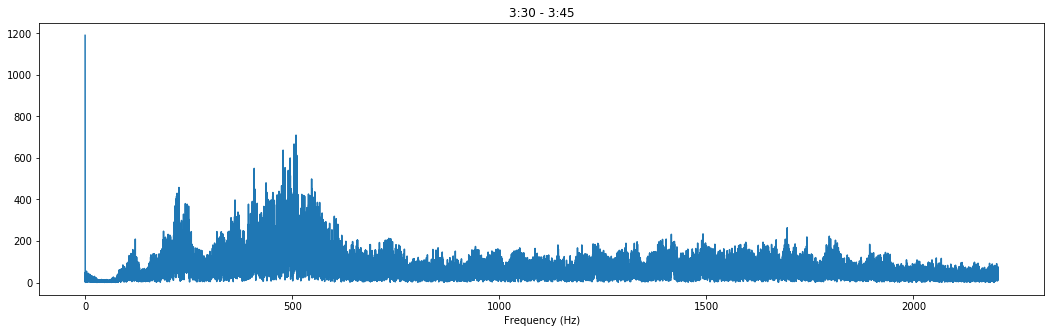

In [71]:
plot_6_minutes(X_ADVS_CFO, sr)

## Speaker 7: AMD CEO / Female
### 5 minutes

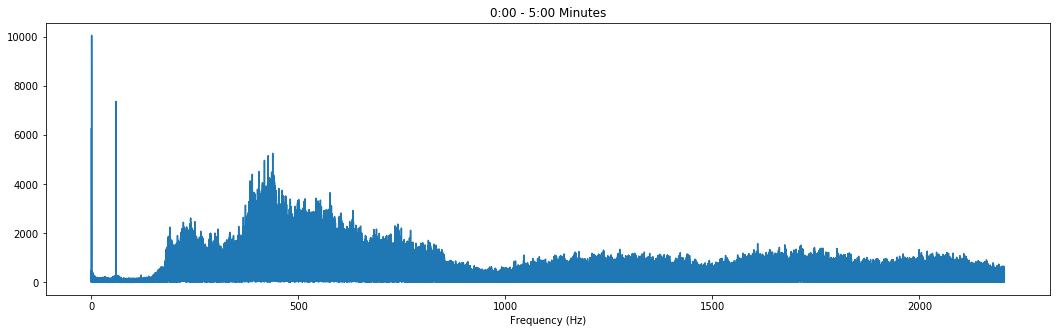

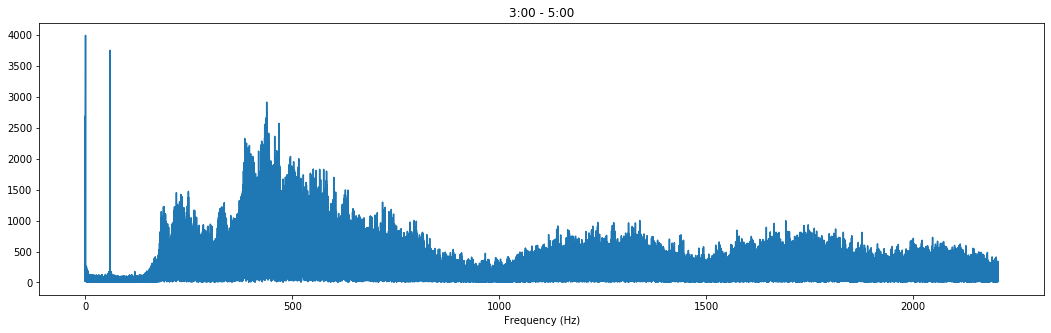

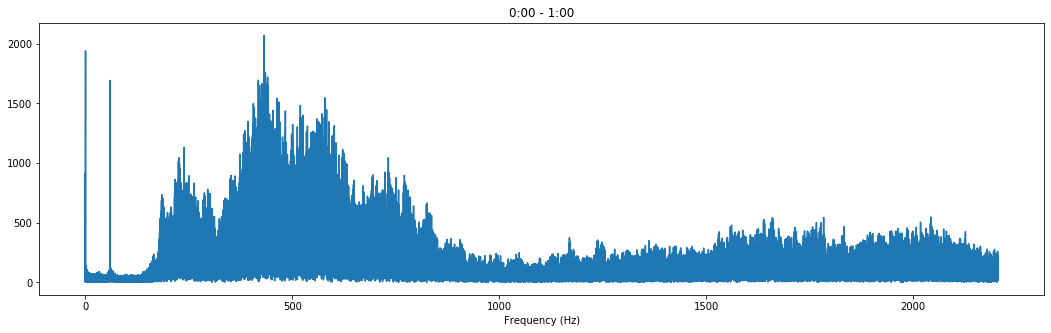

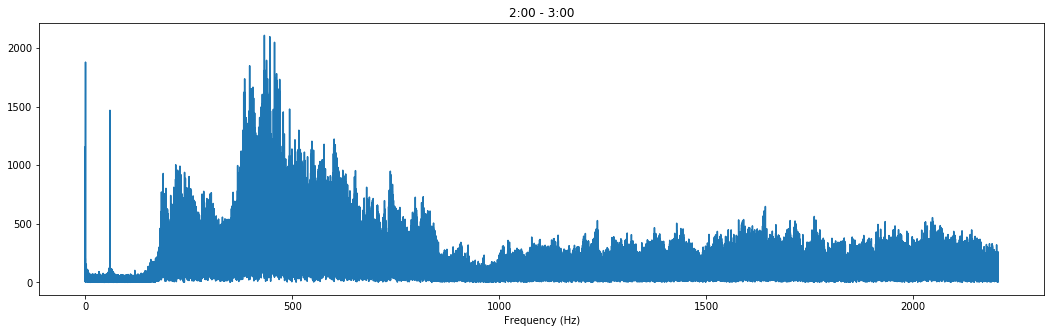

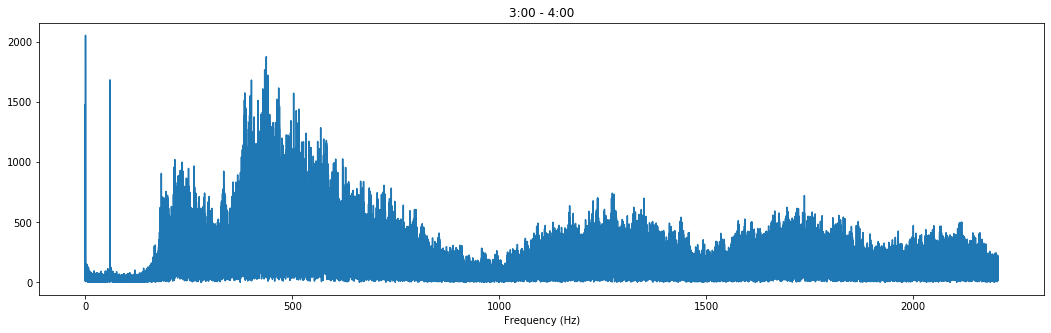

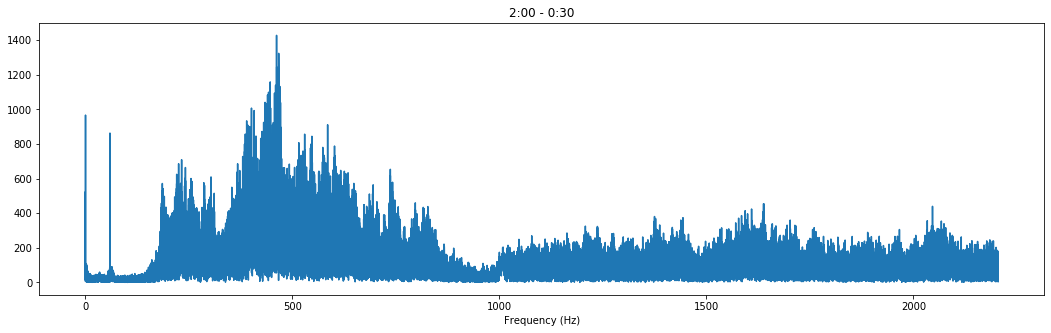

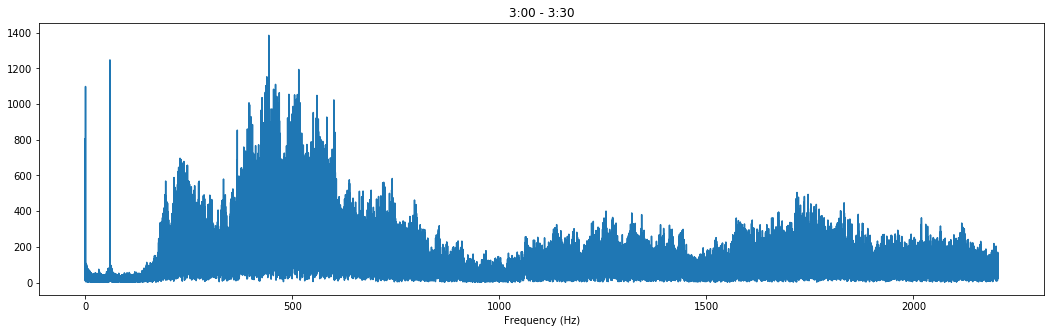

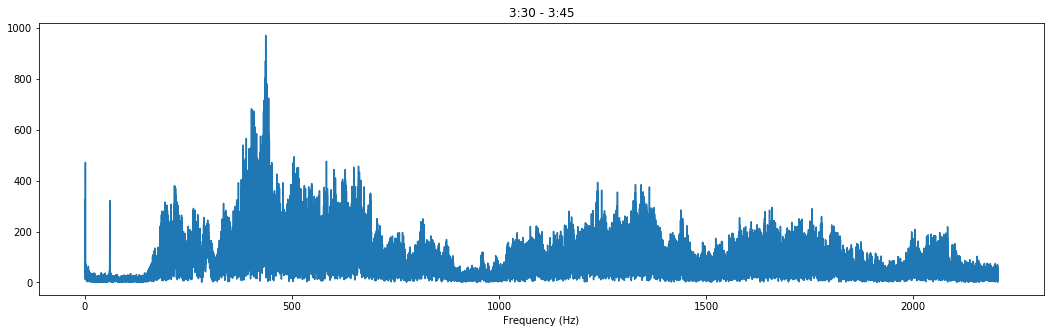

In [72]:
plot_5_minutes(X_AMD_CEO, sr)

## Speaker 8: AMD CFO / Male

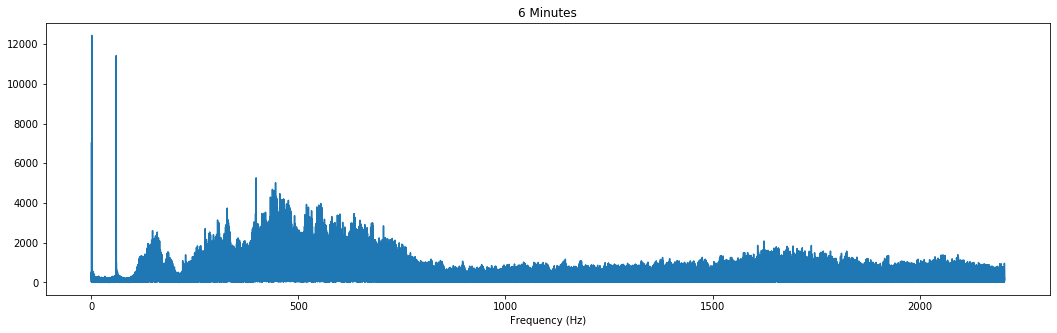

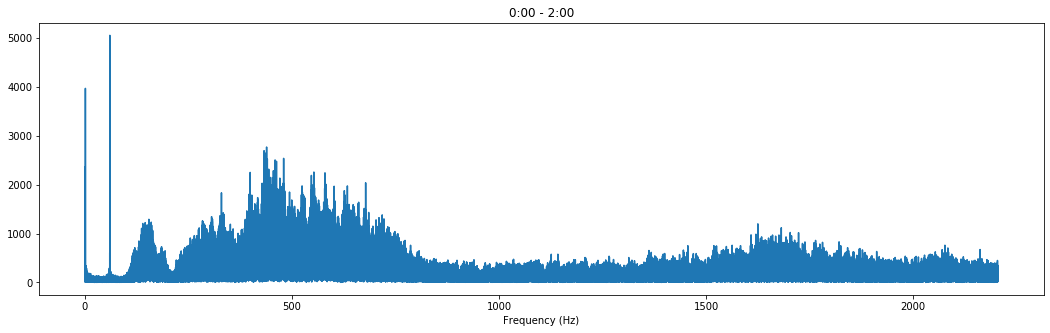

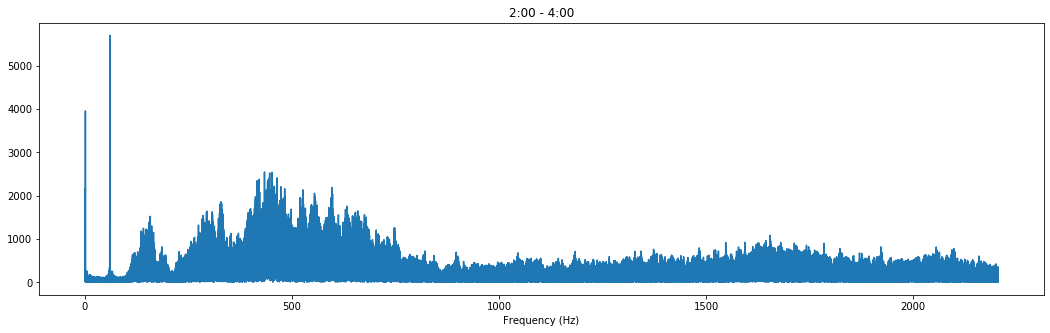

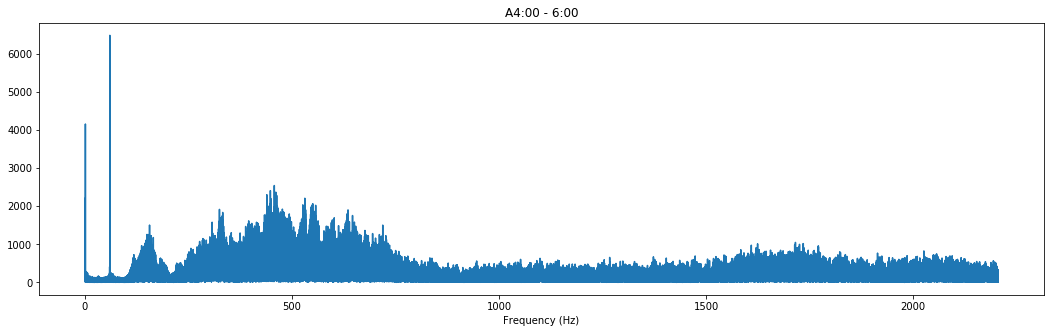

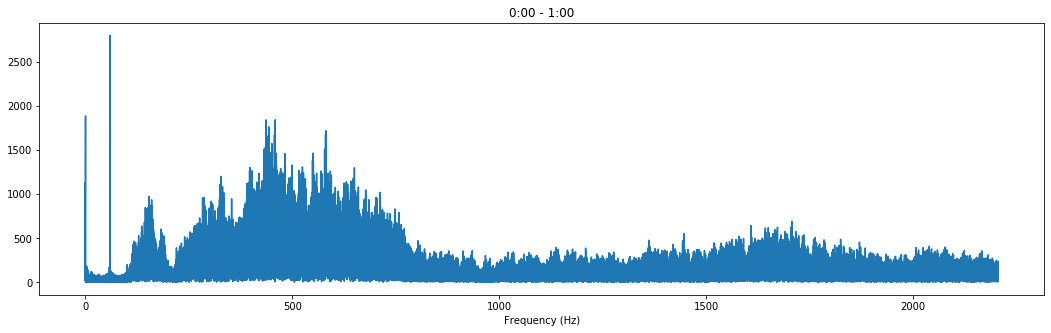

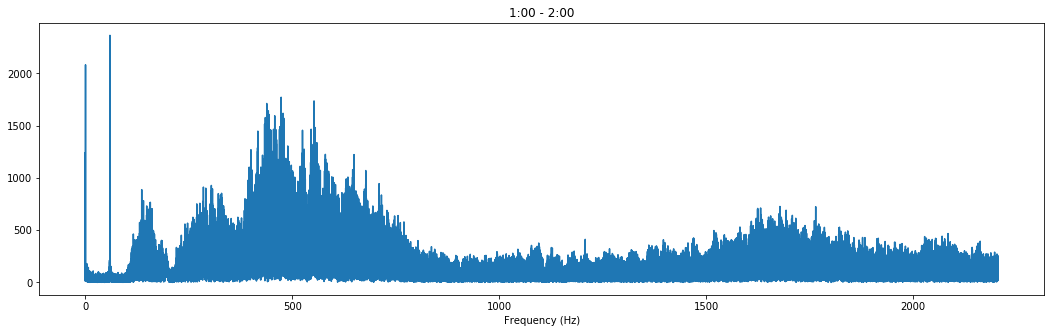

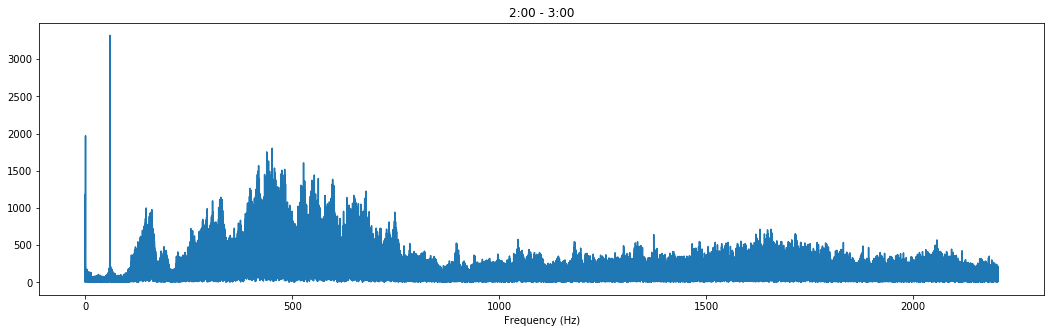

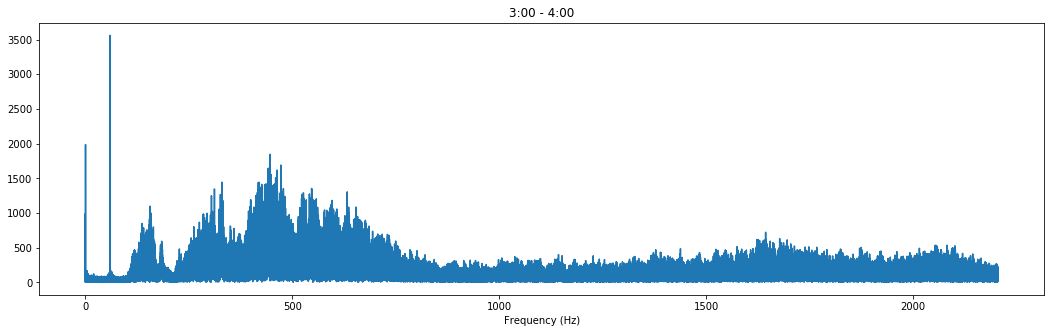

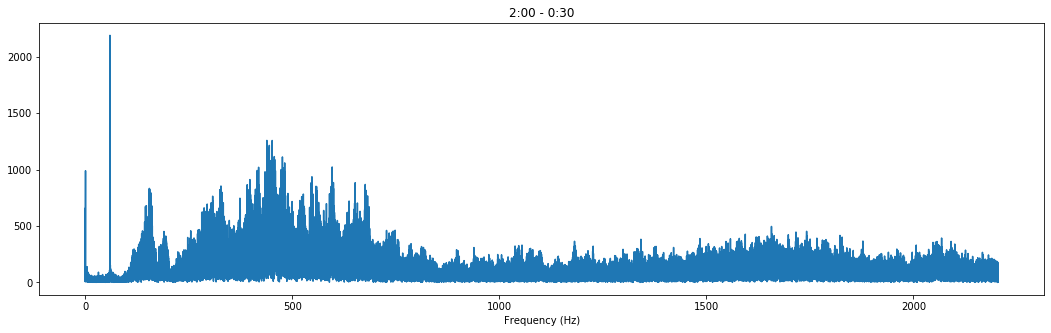

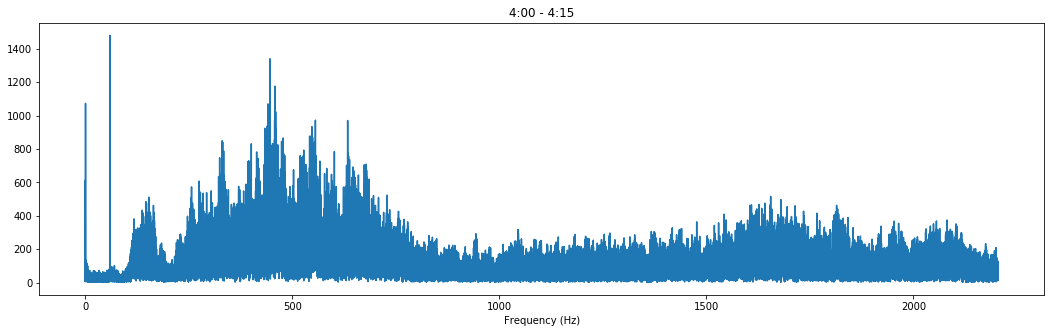

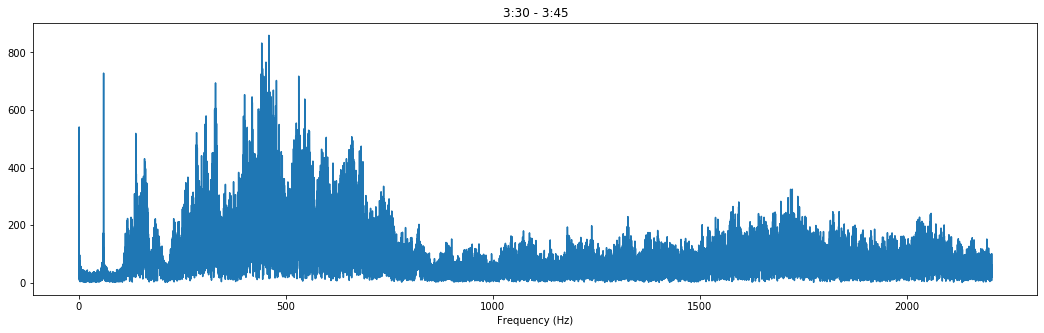

In [73]:
plot_6_minutes(X_AMD_CFO, sr)

## Speaker 9: AVP CFO / Male

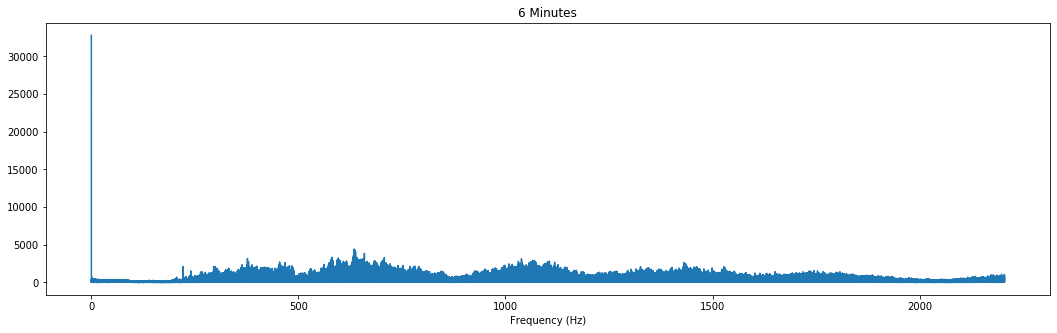

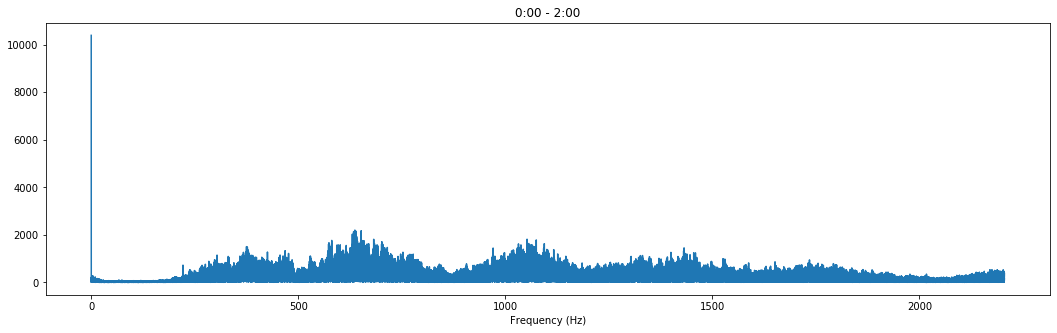

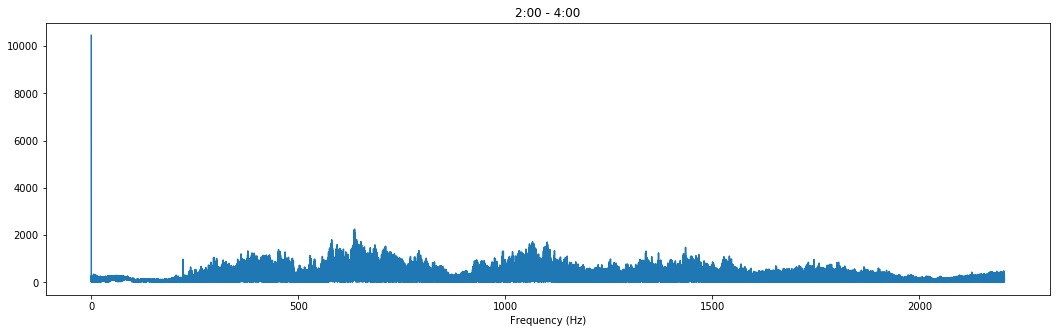

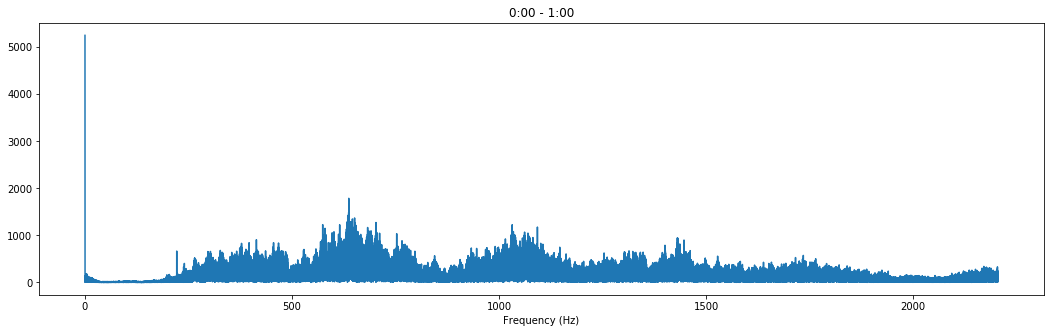

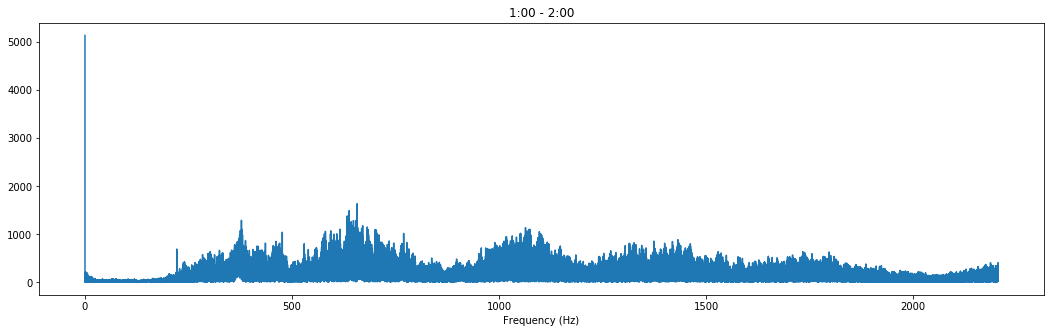

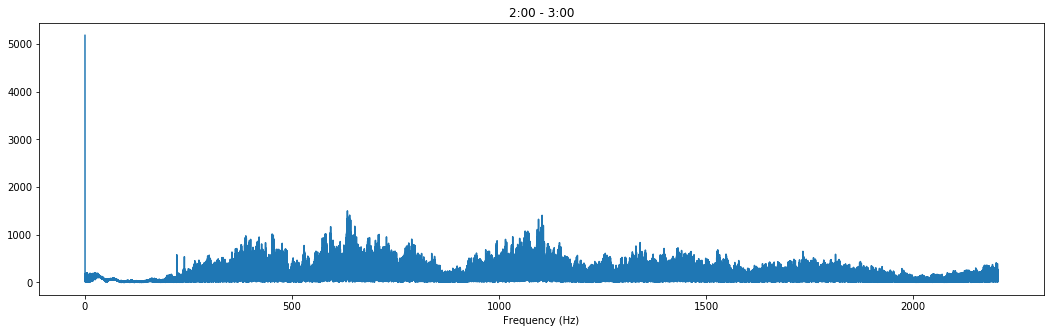

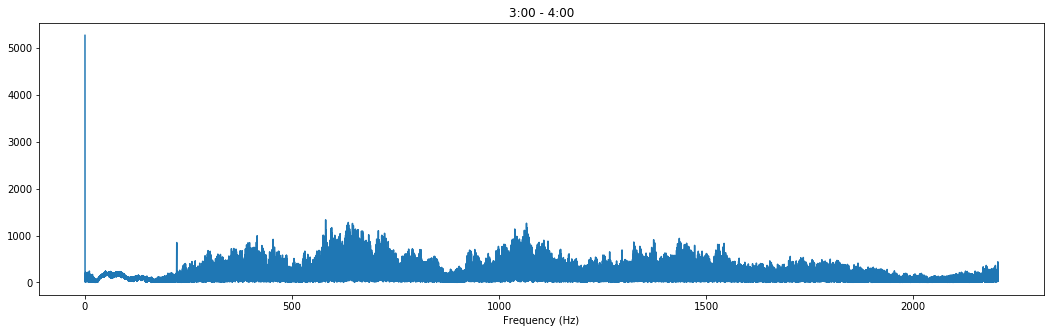

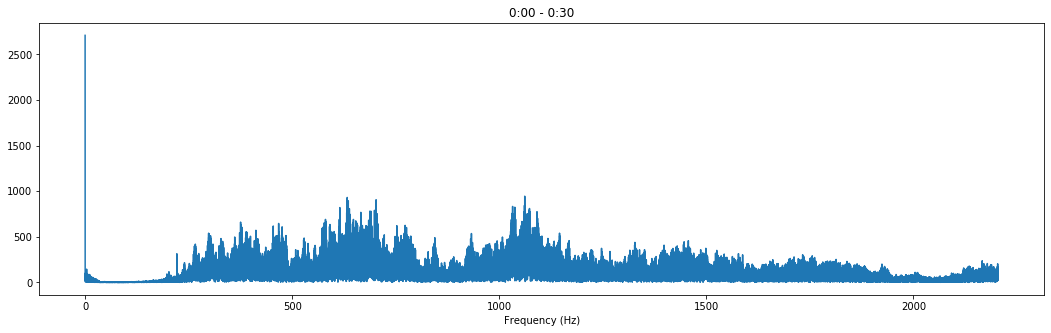

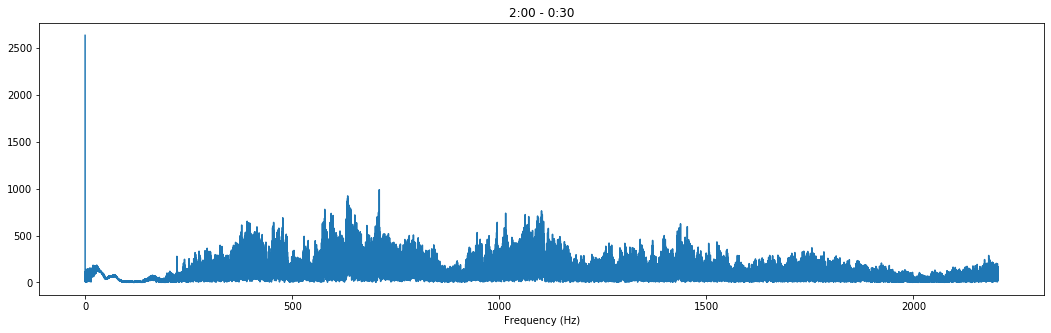

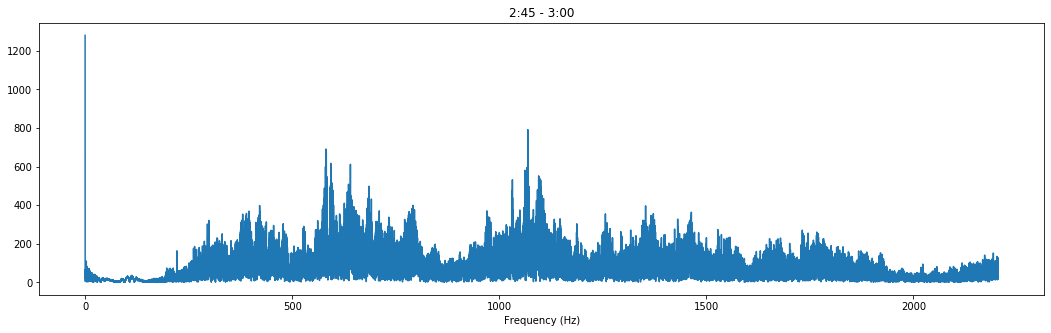

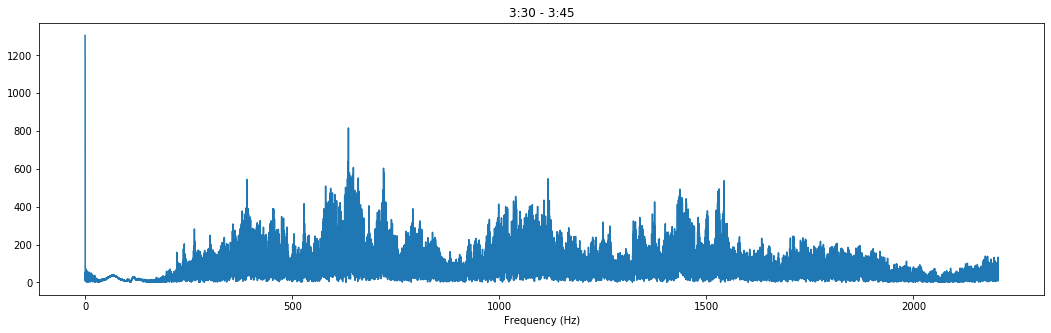

In [74]:
plot_6_minutes(X_AVP_CFO, sr)

## Speaker 10: BHE CFO / Female

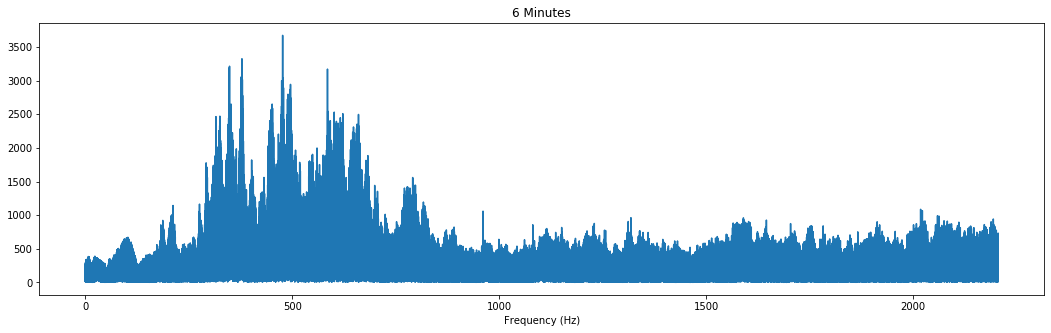

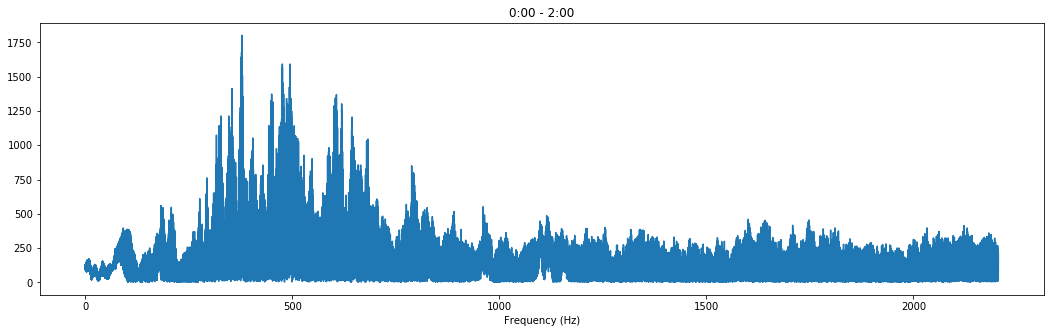

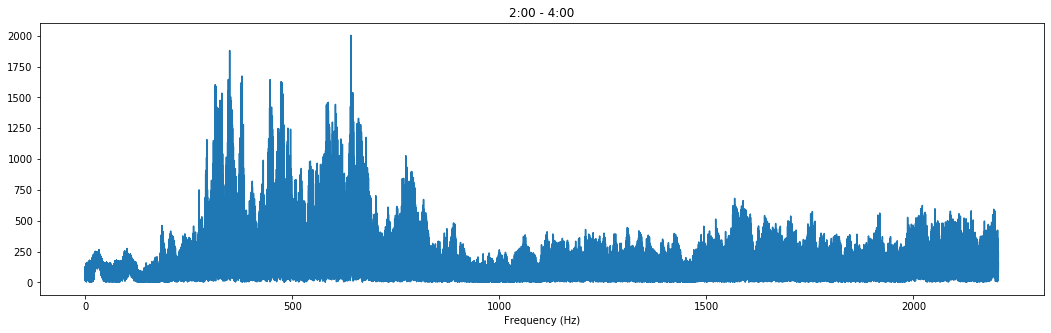

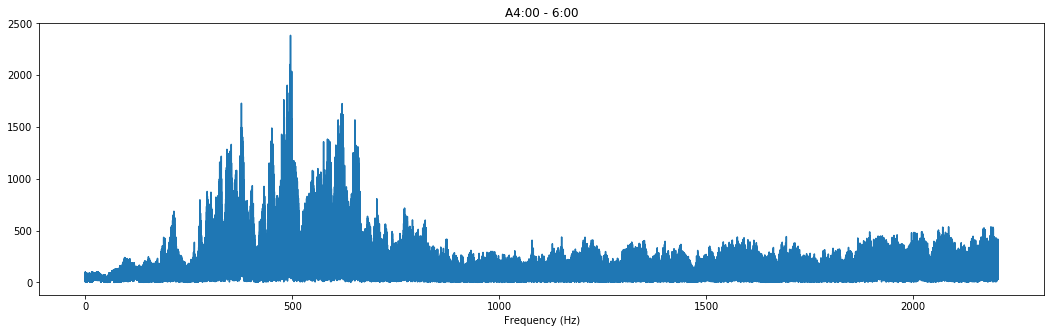

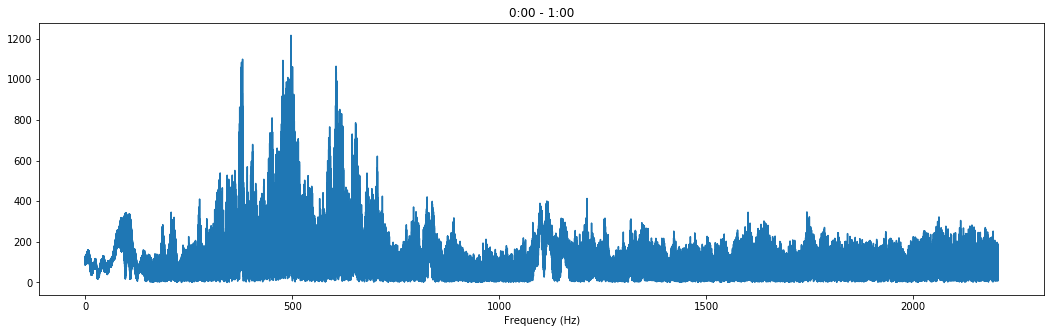

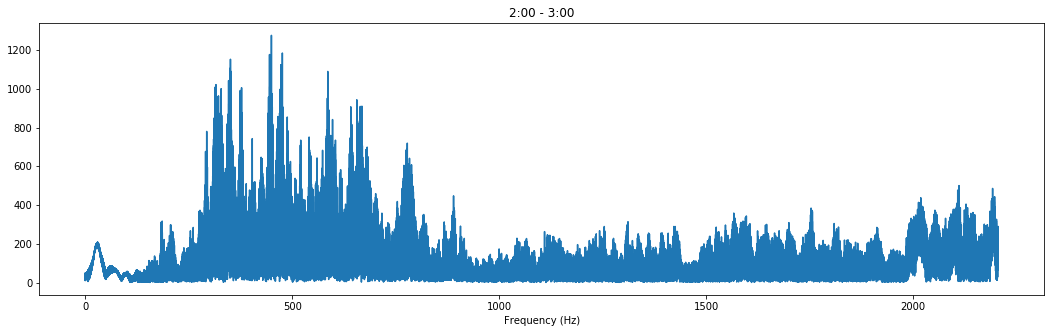

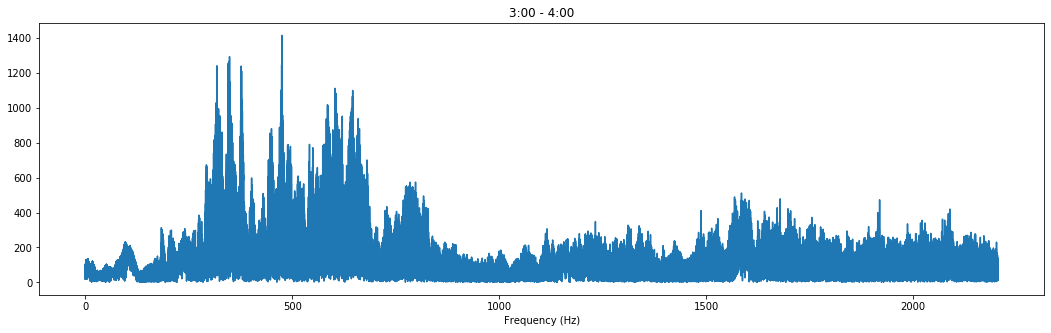

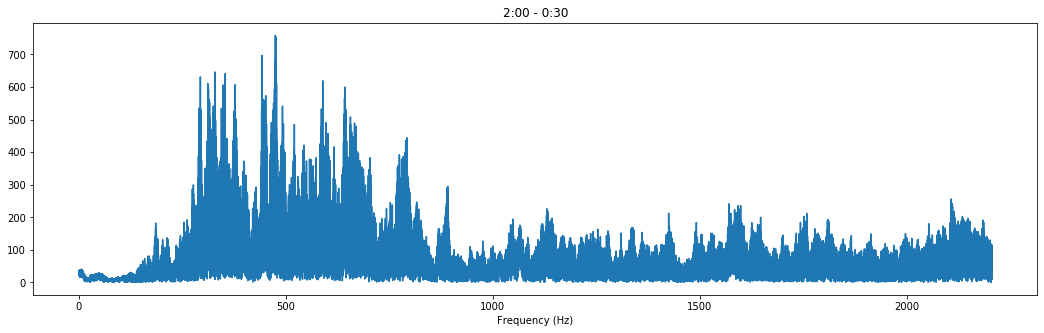

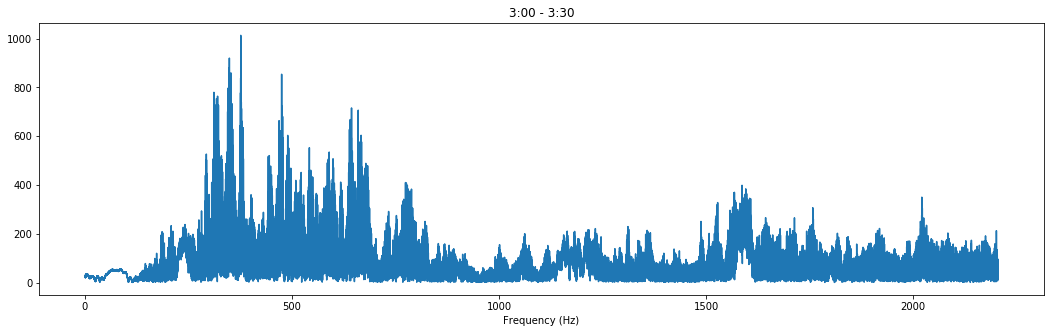

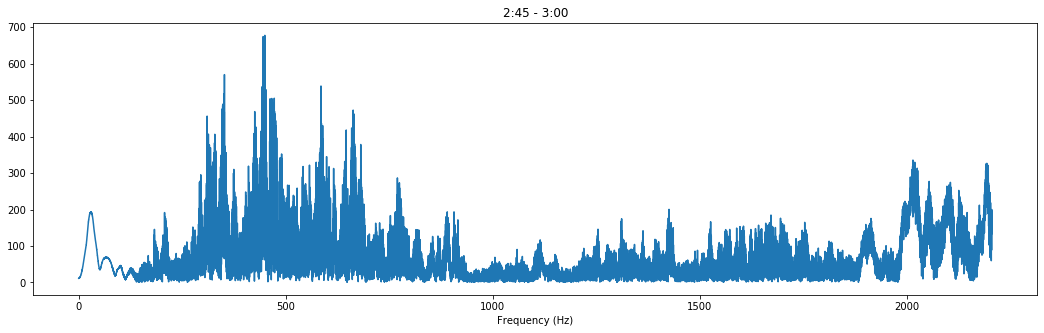

In [75]:
plot_6_minutes(X_BHE_CFO, sr)

## Speaker 11: CLW CFO / Male

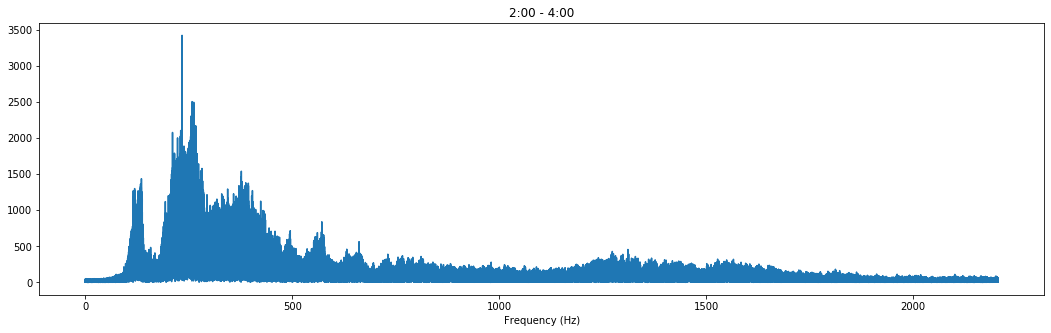

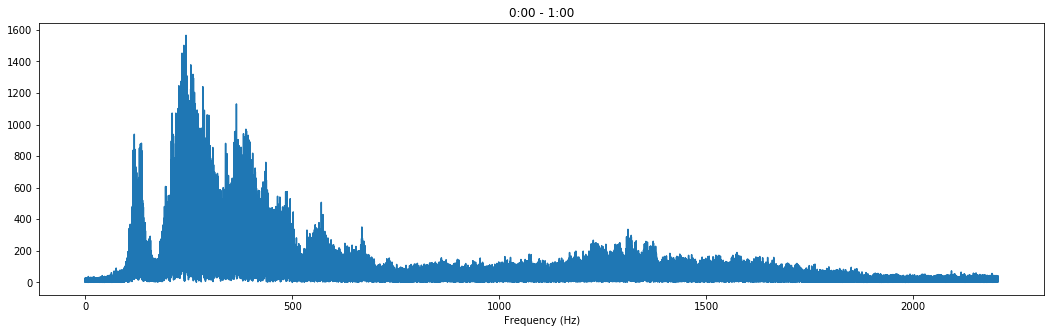

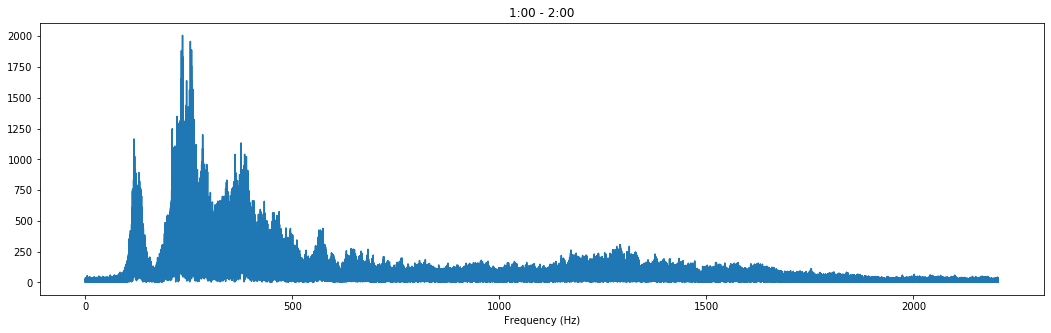

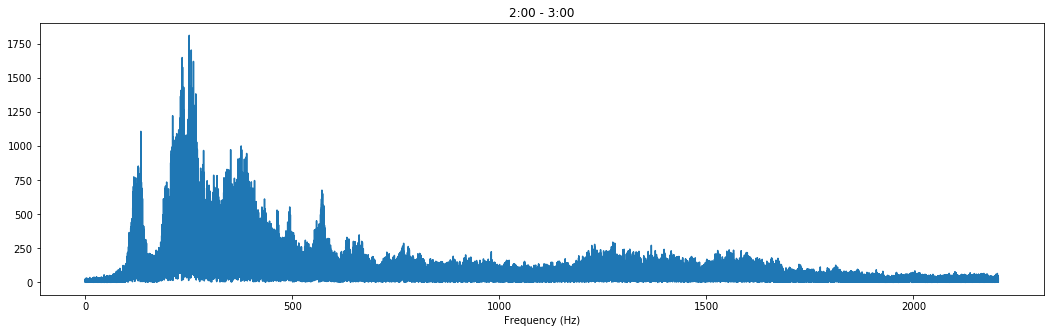

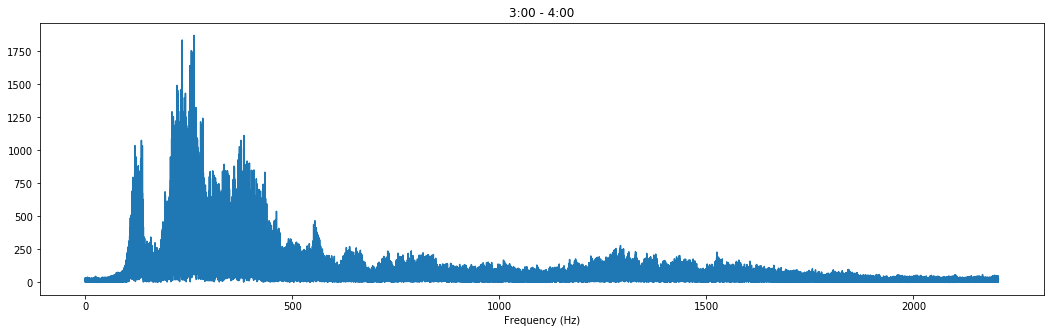

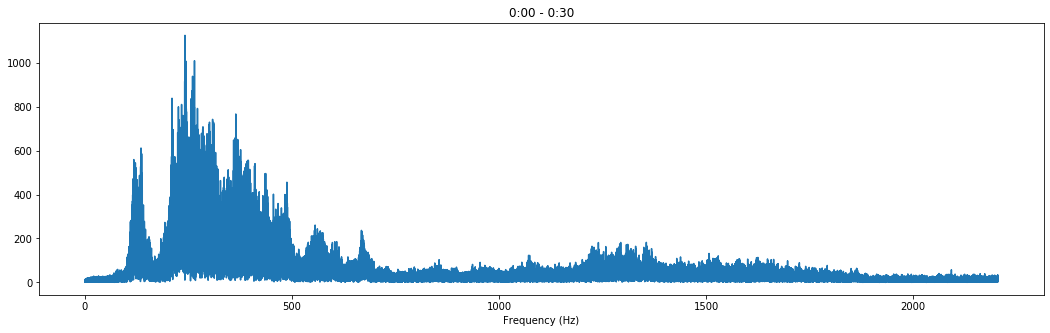

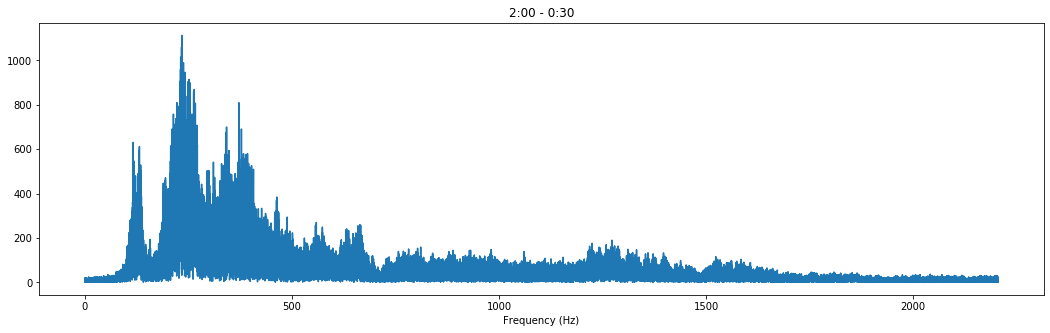

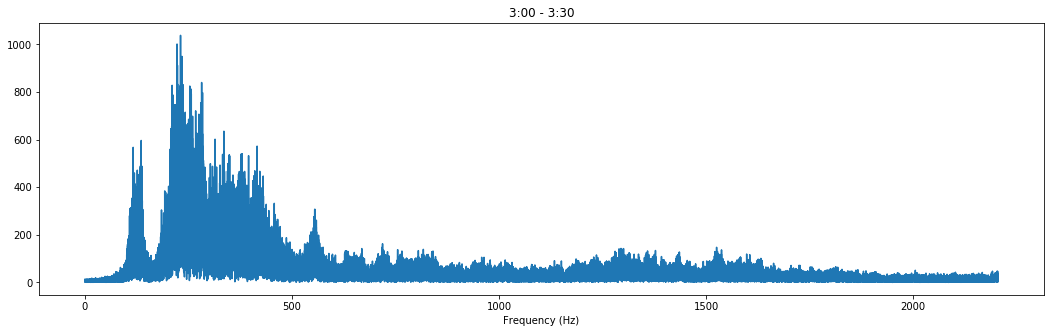

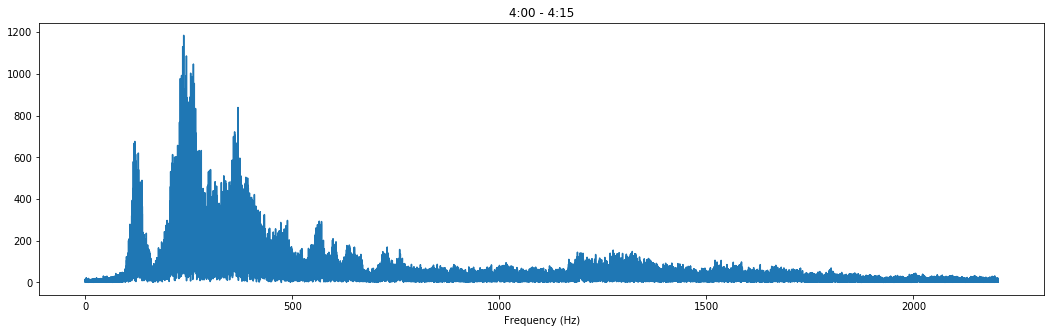

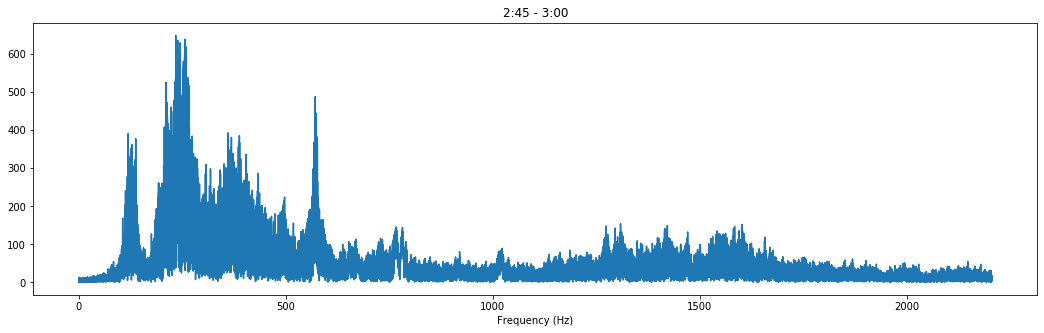

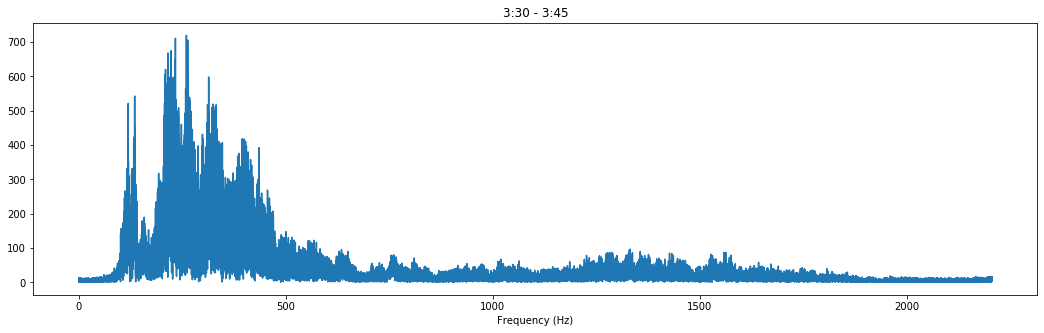

In [76]:
plot_6_minutes(X_CLW_CFO, sr)